# Deep Q-Learning

Install dependencies for AI gym to run properly (shouldn't take more than a minute). If running on google cloud or running locally, only need to run once. Colab may require installing everytime the vm shuts down.

In [ ]:
!pip3 install gym pyvirtualdisplay
!sudo apt-get install -y xvfb python-opengl ffmpeg

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 721 kB 5.0 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827623 sha256=8bf773399c1dc258a9bae1d8b7aa153926f9b578220f718a639c20da454f6b04
  Stored in directory: /u/qilong/.cache/pip/wheels/af/2b/30/5e78b8b9599f2a2286a582b8da80594f654bf0e18d825a4405
Successfully built gym
/bin/bash: /usr/bin/sudo: Permission denied


In [ ]:
!pip install ffmpeg

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=0d50f6bd0aec9017f112e00d4604a210aeeb99e73d8e8ebcbf7aa2280e93f068
  Stored in directory: /u/qilong/.cache/pip/wheels/1d/57/24/4eff6a03a9ea0e647568e8a5a0546cdf957e3cf005372c0245
Successfully built ffmpeg


In [ ]:
!pip3 install --upgrade setuptools --user
!pip3 install ez_setup
!pip3 install gym[atari]
!pip3 install gym[accept-rom-license]

  Using cached setuptools-69.5.1-py3-none-any.whl (894 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
Defaulting to user installation because normal site-packages is not writeable
  Created wheel for ez-setup: filename=ez_setup-0.9-py3-none-any.whl size=10994 sha256=0e22daeb48edafa38bdb9af1185f4718d74a3c446fdd70fdc2c1740079b98031
  Stored in directory: /u/qilong/.cache/pip/wheels/d7/39/49/e7ce9ce92f074adc6f755a0cc05992407730e14d94ce3f9554
Successfully built ez-setup
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.7 MB 5.2 MB/s eta 0:00:01
Defaulting to user installation because normal site-packages is 

In [ ]:
!pip install scikit-image

Defaulting to user installation because normal site-packages is not writeable


For this assignment we will implement the Deep Q-Learning algorithm with Experience Replay as described in breakthrough paper __"Playing Atari with Deep Reinforcement Learning"__. We will train an agent to play the famous game of __Breakout__.

In [ ]:
%matplotlib inline

import sys
import gym
import torch
import pylab
import random
import numpy as np
from collections import deque
from datetime import datetime
from copy import deepcopy
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
from utils import find_max_lives, check_live, get_frame, get_init_state
from model import DQN, DQN_LSTM
from config import *

import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Understanding the environment

In the following cell, we initialize our game of __Breakout__ and you can see how the environment looks like. For further documentation of the of the environment refer to https://gym.openai.com/envs.

In breakout, we will use 3 actions "fire", "left", and "right". "fire" is only used to reset the game when a life is lost, "left" moves the agent left and "right" moves the agent right.

In [ ]:
env = gym.make('BreakoutDeterministic-v4')
state = env.reset()
print(state[0].shape)

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


(210, 160, 3)


In [ ]:
number_lives = find_max_lives(env)
state_size = env.observation_space.shape
action_size = 3 #fire, left, and right
print(number_lives)
print(state_size)

5
(210, 160, 3)


## Creating a DQN Agent

Here we create a DQN Agent. This agent is defined in the __agent.py__. The corresponding neural network is defined in the __model.py__. Once you've created a working DQN agent, use the code in agent.py to create a double DQN agent in __agent_double.py__. Set the flag "double_dqn" to True to train the double DQN agent.

__Evaluation Reward__ : The average reward received in the past 100 episodes/games.

__Frame__ : Number of frames processed in total.

__Memory Size__ : The current size of the replay memory.

In [ ]:
double_dqn = False # set to True if using double DQN agent

if double_dqn:
    from agent_double import Agent
else:
    from agent import Agent

agent = Agent(action_size)
evaluation_reward = deque(maxlen=evaluation_reward_length)
frame = 0
memory_size = 0

### Main Training Loop

In this training loop, we do not render the screen because it slows down training signficantly. To watch the agent play the game, run the code in next section "Visualize Agent Performance"

episode: 0   score: 2.0   memory length: 200   epsilon: 1.0    steps: 200    lr: 0.0001     evaluation reward: 2.0
episode: 1   score: 2.0   memory length: 398   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 2.0
episode: 2   score: 0.0   memory length: 521   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.3333333333333333
episode: 3   score: 0.0   memory length: 644   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.0
episode: 4   score: 0.0   memory length: 766   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 0.8
episode: 5   score: 0.0   memory length: 889   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 0.6666666666666666
episode: 6   score: 1.0   memory length: 1042   epsilon: 1.0    steps: 153    lr: 0.0001     evaluation reward: 0.7142857142857143
episode: 7   score: 0.0   memory length: 1165   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 0.625
episode: 8   score: 3.0   memor

episode: 65   score: 2.0   memory length: 11841   epsilon: 1.0    steps: 217    lr: 0.0001     evaluation reward: 1.4090909090909092
episode: 66   score: 0.0   memory length: 11964   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.3880597014925373
episode: 67   score: 2.0   memory length: 12180   epsilon: 1.0    steps: 216    lr: 0.0001     evaluation reward: 1.3970588235294117
episode: 68   score: 2.0   memory length: 12397   epsilon: 1.0    steps: 217    lr: 0.0001     evaluation reward: 1.4057971014492754
episode: 69   score: 0.0   memory length: 12519   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.3857142857142857
episode: 70   score: 2.0   memory length: 12717   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 1.3943661971830985
episode: 71   score: 4.0   memory length: 13015   epsilon: 1.0    steps: 298    lr: 0.0001     evaluation reward: 1.4305555555555556
episode: 72   score: 2.0   memory length: 13216   epsilon: 1.0    ste

episode: 131   score: 0.0   memory length: 23637   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.42
episode: 132   score: 1.0   memory length: 23788   epsilon: 1.0    steps: 151    lr: 0.0001     evaluation reward: 1.43
episode: 133   score: 1.0   memory length: 23960   epsilon: 1.0    steps: 172    lr: 0.0001     evaluation reward: 1.44
episode: 134   score: 3.0   memory length: 24188   epsilon: 1.0    steps: 228    lr: 0.0001     evaluation reward: 1.46
episode: 135   score: 1.0   memory length: 24340   epsilon: 1.0    steps: 152    lr: 0.0001     evaluation reward: 1.46
episode: 136   score: 2.0   memory length: 24558   epsilon: 1.0    steps: 218    lr: 0.0001     evaluation reward: 1.45
episode: 137   score: 1.0   memory length: 24727   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.45
episode: 138   score: 2.0   memory length: 24945   epsilon: 1.0    steps: 218    lr: 0.0001     evaluation reward: 1.42
episode: 139   score: 0.0   memory lengt

episode: 200   score: 0.0   memory length: 35525   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.18
episode: 201   score: 0.0   memory length: 35648   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.16
episode: 202   score: 1.0   memory length: 35817   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.17
episode: 203   score: 5.0   memory length: 36124   epsilon: 1.0    steps: 307    lr: 0.0001     evaluation reward: 1.22
episode: 204   score: 2.0   memory length: 36340   epsilon: 1.0    steps: 216    lr: 0.0001     evaluation reward: 1.24
episode: 205   score: 1.0   memory length: 36508   epsilon: 1.0    steps: 168    lr: 0.0001     evaluation reward: 1.24
episode: 206   score: 2.0   memory length: 36690   epsilon: 1.0    steps: 182    lr: 0.0001     evaluation reward: 1.25
episode: 207   score: 0.0   memory length: 36813   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.24
episode: 208   score: 2.0   memory lengt

episode: 269   score: 3.0   memory length: 48138   epsilon: 1.0    steps: 266    lr: 0.0001     evaluation reward: 1.38
episode: 270   score: 1.0   memory length: 48308   epsilon: 1.0    steps: 170    lr: 0.0001     evaluation reward: 1.39
episode: 271   score: 2.0   memory length: 48526   epsilon: 1.0    steps: 218    lr: 0.0001     evaluation reward: 1.4
episode: 272   score: 0.0   memory length: 48648   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.38
episode: 273   score: 2.0   memory length: 48845   epsilon: 1.0    steps: 197    lr: 0.0001     evaluation reward: 1.39
episode: 274   score: 2.0   memory length: 49063   epsilon: 1.0    steps: 218    lr: 0.0001     evaluation reward: 1.4
episode: 275   score: 3.0   memory length: 49334   epsilon: 1.0    steps: 271    lr: 0.0001     evaluation reward: 1.41
episode: 276   score: 3.0   memory length: 49600   epsilon: 1.0    steps: 266    lr: 0.0001     evaluation reward: 1.44
episode: 277   score: 0.0   memory length:

episode: 338   score: 1.0   memory length: 60006   epsilon: 1.0    steps: 172    lr: 0.0001     evaluation reward: 1.33
episode: 339   score: 1.0   memory length: 60175   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.33
episode: 340   score: 2.0   memory length: 60392   epsilon: 1.0    steps: 217    lr: 0.0001     evaluation reward: 1.34
episode: 341   score: 2.0   memory length: 60608   epsilon: 1.0    steps: 216    lr: 0.0001     evaluation reward: 1.33
episode: 342   score: 1.0   memory length: 60777   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.34
episode: 343   score: 0.0   memory length: 60899   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.32
episode: 344   score: 0.0   memory length: 61022   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.29
episode: 345   score: 0.0   memory length: 61145   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.28
episode: 346   score: 2.0   memory lengt

episode: 407   score: 1.0   memory length: 72791   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.29
episode: 408   score: 3.0   memory length: 73037   epsilon: 1.0    steps: 246    lr: 0.0001     evaluation reward: 1.31
episode: 409   score: 2.0   memory length: 73235   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 1.33
episode: 410   score: 3.0   memory length: 73478   epsilon: 1.0    steps: 243    lr: 0.0001     evaluation reward: 1.36
episode: 411   score: 2.0   memory length: 73659   epsilon: 1.0    steps: 181    lr: 0.0001     evaluation reward: 1.36
episode: 412   score: 1.0   memory length: 73810   epsilon: 1.0    steps: 151    lr: 0.0001     evaluation reward: 1.36
episode: 413   score: 1.0   memory length: 73979   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.36
episode: 414   score: 0.0   memory length: 74102   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.36
episode: 415   score: 2.0   memory lengt

episode: 476   score: 0.0   memory length: 84795   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.41
episode: 477   score: 3.0   memory length: 85042   epsilon: 1.0    steps: 247    lr: 0.0001     evaluation reward: 1.42
episode: 478   score: 3.0   memory length: 85288   epsilon: 1.0    steps: 246    lr: 0.0001     evaluation reward: 1.44
episode: 479   score: 0.0   memory length: 85411   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.38
episode: 480   score: 2.0   memory length: 85608   epsilon: 1.0    steps: 197    lr: 0.0001     evaluation reward: 1.38
episode: 481   score: 0.0   memory length: 85730   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.35
episode: 482   score: 4.0   memory length: 85987   epsilon: 1.0    steps: 257    lr: 0.0001     evaluation reward: 1.36
episode: 483   score: 0.0   memory length: 86110   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.35
episode: 484   score: 1.0   memory lengt

episode: 545   score: 2.0   memory length: 97748   epsilon: 1.0    steps: 215    lr: 0.0001     evaluation reward: 1.39
episode: 546   score: 0.0   memory length: 97870   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.39
episode: 547   score: 0.0   memory length: 97992   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.39
episode: 548   score: 2.0   memory length: 98209   epsilon: 1.0    steps: 217    lr: 0.0001     evaluation reward: 1.4
episode: 549   score: 2.0   memory length: 98406   epsilon: 1.0    steps: 197    lr: 0.0001     evaluation reward: 1.41
episode: 550   score: 2.0   memory length: 98624   epsilon: 1.0    steps: 218    lr: 0.0001     evaluation reward: 1.42
episode: 551   score: 2.0   memory length: 98821   epsilon: 1.0    steps: 197    lr: 0.0001     evaluation reward: 1.44
episode: 552   score: 4.0   memory length: 99139   epsilon: 1.0    steps: 318    lr: 0.0001     evaluation reward: 1.48
episode: 553   score: 1.0   memory length

/u/qilong/QA_generator/CS444/mp5/memory.py:30: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  sample = np.array(sample, dtype=object)
/u/qilong/QA_generator/CS444/mp5/agent.py:63: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created wit

episode: 557   score: 0.0   memory length: 100071   epsilon: 0.9998574400000031    steps: 123    lr: 0.0001     evaluation reward: 1.48
episode: 558   score: 0.0   memory length: 100193   epsilon: 0.9996158800000083    steps: 122    lr: 0.0001     evaluation reward: 1.45
episode: 559   score: 5.0   memory length: 100499   epsilon: 0.9990100000000215    steps: 306    lr: 0.0001     evaluation reward: 1.49
episode: 560   score: 0.0   memory length: 100622   epsilon: 0.9987664600000268    steps: 123    lr: 0.0001     evaluation reward: 1.49
episode: 561   score: 0.0   memory length: 100744   epsilon: 0.998524900000032    steps: 122    lr: 0.0001     evaluation reward: 1.49
episode: 562   score: 0.0   memory length: 100866   epsilon: 0.9982833400000373    steps: 122    lr: 0.0001     evaluation reward: 1.49
episode: 563   score: 3.0   memory length: 101098   epsilon: 0.9978239800000472    steps: 232    lr: 0.0001     evaluation reward: 1.51
episode: 564   score: 0.0   memory length: 101221

episode: 618   score: 3.0   memory length: 111860   epsilon: 0.9765152200005098    steps: 226    lr: 0.0001     evaluation reward: 1.59
episode: 619   score: 2.0   memory length: 112083   epsilon: 0.9760736800005194    steps: 223    lr: 0.0001     evaluation reward: 1.61
episode: 620   score: 0.0   memory length: 112206   epsilon: 0.9758301400005247    steps: 123    lr: 0.0001     evaluation reward: 1.6
episode: 621   score: 0.0   memory length: 112329   epsilon: 0.97558660000053    steps: 123    lr: 0.0001     evaluation reward: 1.55
episode: 622   score: 1.0   memory length: 112498   epsilon: 0.9752519800005373    steps: 169    lr: 0.0001     evaluation reward: 1.54
episode: 623   score: 0.0   memory length: 112620   epsilon: 0.9750104200005425    steps: 122    lr: 0.0001     evaluation reward: 1.54
episode: 624   score: 1.0   memory length: 112789   epsilon: 0.9746758000005498    steps: 169    lr: 0.0001     evaluation reward: 1.55
episode: 625   score: 1.0   memory length: 112939  

episode: 679   score: 3.0   memory length: 121762   epsilon: 0.9569092600009355    steps: 225    lr: 0.0001     evaluation reward: 1.28
episode: 680   score: 5.0   memory length: 122106   epsilon: 0.9562281400009502    steps: 344    lr: 0.0001     evaluation reward: 1.33
episode: 681   score: 2.0   memory length: 122304   epsilon: 0.9558361000009588    steps: 198    lr: 0.0001     evaluation reward: 1.3
episode: 682   score: 2.0   memory length: 122502   epsilon: 0.9554440600009673    steps: 198    lr: 0.0001     evaluation reward: 1.28
episode: 683   score: 1.0   memory length: 122655   epsilon: 0.9551411200009738    steps: 153    lr: 0.0001     evaluation reward: 1.28
episode: 684   score: 2.0   memory length: 122852   epsilon: 0.9547510600009823    steps: 197    lr: 0.0001     evaluation reward: 1.29
episode: 685   score: 0.0   memory length: 122974   epsilon: 0.9545095000009876    steps: 122    lr: 0.0001     evaluation reward: 1.27
episode: 686   score: 2.0   memory length: 123174

episode: 740   score: 0.0   memory length: 133356   epsilon: 0.9339531400014338    steps: 122    lr: 0.0001     evaluation reward: 1.37
episode: 741   score: 2.0   memory length: 133554   epsilon: 0.9335611000014423    steps: 198    lr: 0.0001     evaluation reward: 1.37
episode: 742   score: 2.0   memory length: 133772   epsilon: 0.9331294600014517    steps: 218    lr: 0.0001     evaluation reward: 1.39
episode: 743   score: 0.0   memory length: 133895   epsilon: 0.932885920001457    steps: 123    lr: 0.0001     evaluation reward: 1.39
episode: 744   score: 0.0   memory length: 134018   epsilon: 0.9326423800014623    steps: 123    lr: 0.0001     evaluation reward: 1.39
episode: 745   score: 2.0   memory length: 134235   epsilon: 0.9322127200014716    steps: 217    lr: 0.0001     evaluation reward: 1.38
episode: 746   score: 4.0   memory length: 134512   epsilon: 0.9316642600014835    steps: 277    lr: 0.0001     evaluation reward: 1.4
episode: 747   score: 1.0   memory length: 134684 

episode: 801   score: 3.0   memory length: 145530   epsilon: 0.9098486200019571    steps: 246    lr: 0.0001     evaluation reward: 1.83
episode: 802   score: 0.0   memory length: 145653   epsilon: 0.9096050800019624    steps: 123    lr: 0.0001     evaluation reward: 1.81
episode: 803   score: 1.0   memory length: 145822   epsilon: 0.9092704600019696    steps: 169    lr: 0.0001     evaluation reward: 1.81
episode: 804   score: 0.0   memory length: 145944   epsilon: 0.9090289000019749    steps: 122    lr: 0.0001     evaluation reward: 1.79
episode: 805   score: 0.0   memory length: 146067   epsilon: 0.9087853600019802    steps: 123    lr: 0.0001     evaluation reward: 1.78
episode: 806   score: 0.0   memory length: 146190   epsilon: 0.9085418200019855    steps: 123    lr: 0.0001     evaluation reward: 1.76
episode: 807   score: 3.0   memory length: 146416   epsilon: 0.9080943400019952    steps: 226    lr: 0.0001     evaluation reward: 1.76
episode: 808   score: 0.0   memory length: 14653

episode: 862   score: 1.0   memory length: 156765   epsilon: 0.88760332000244    steps: 172    lr: 0.0001     evaluation reward: 1.75
episode: 863   score: 2.0   memory length: 156985   epsilon: 0.8871677200024495    steps: 220    lr: 0.0001     evaluation reward: 1.75
episode: 864   score: 1.0   memory length: 157137   epsilon: 0.886866760002456    steps: 152    lr: 0.0001     evaluation reward: 1.73
episode: 865   score: 1.0   memory length: 157308   epsilon: 0.8865281800024634    steps: 171    lr: 0.0001     evaluation reward: 1.71
episode: 866   score: 3.0   memory length: 157556   epsilon: 0.886037140002474    steps: 248    lr: 0.0001     evaluation reward: 1.73
episode: 867   score: 2.0   memory length: 157736   epsilon: 0.8856807400024818    steps: 180    lr: 0.0001     evaluation reward: 1.72
episode: 868   score: 3.0   memory length: 157965   epsilon: 0.8852273200024916    steps: 229    lr: 0.0001     evaluation reward: 1.71
episode: 869   score: 3.0   memory length: 158191   

episode: 923   score: 1.0   memory length: 169126   epsilon: 0.8631285400029713    steps: 172    lr: 0.0001     evaluation reward: 1.88
episode: 924   score: 0.0   memory length: 169249   epsilon: 0.8628850000029766    steps: 123    lr: 0.0001     evaluation reward: 1.87
episode: 925   score: 0.0   memory length: 169371   epsilon: 0.8626434400029819    steps: 122    lr: 0.0001     evaluation reward: 1.87
episode: 926   score: 2.0   memory length: 169592   epsilon: 0.8622058600029914    steps: 221    lr: 0.0001     evaluation reward: 1.87
episode: 927   score: 2.0   memory length: 169792   epsilon: 0.861809860003    steps: 200    lr: 0.0001     evaluation reward: 1.85
episode: 928   score: 3.0   memory length: 170062   epsilon: 0.8612752600030116    steps: 270    lr: 0.0001     evaluation reward: 1.86
episode: 929   score: 1.0   memory length: 170212   epsilon: 0.860978260003018    steps: 150    lr: 0.0001     evaluation reward: 1.87
episode: 930   score: 5.0   memory length: 170517   e

episode: 984   score: 0.0   memory length: 181577   epsilon: 0.8384755600035065    steps: 123    lr: 0.0001     evaluation reward: 2.08
episode: 985   score: 1.0   memory length: 181728   epsilon: 0.838176580003513    steps: 151    lr: 0.0001     evaluation reward: 2.08
episode: 986   score: 1.0   memory length: 181879   epsilon: 0.8378776000035195    steps: 151    lr: 0.0001     evaluation reward: 2.06
episode: 987   score: 3.0   memory length: 182147   epsilon: 0.837346960003531    steps: 268    lr: 0.0001     evaluation reward: 2.06
episode: 988   score: 3.0   memory length: 182375   epsilon: 0.8368955200035408    steps: 228    lr: 0.0001     evaluation reward: 2.05
episode: 989   score: 1.0   memory length: 182544   epsilon: 0.8365609000035481    steps: 169    lr: 0.0001     evaluation reward: 2.04
episode: 990   score: 3.0   memory length: 182790   epsilon: 0.8360738200035587    steps: 246    lr: 0.0001     evaluation reward: 2.03
episode: 991   score: 3.0   memory length: 183016 

episode: 1045   score: 8.0   memory length: 193628   epsilon: 0.8146145800040245    steps: 351    lr: 0.0001     evaluation reward: 1.95
episode: 1046   score: 7.0   memory length: 194022   epsilon: 0.8138344600040415    steps: 394    lr: 0.0001     evaluation reward: 1.99
episode: 1047   score: 2.0   memory length: 194220   epsilon: 0.81344242000405    steps: 198    lr: 0.0001     evaluation reward: 1.99
episode: 1048   score: 4.0   memory length: 194497   epsilon: 0.8128939600040619    steps: 277    lr: 0.0001     evaluation reward: 2.03
episode: 1049   score: 1.0   memory length: 194648   epsilon: 0.8125949800040684    steps: 151    lr: 0.0001     evaluation reward: 2.02
episode: 1050   score: 1.0   memory length: 194798   epsilon: 0.8122979800040748    steps: 150    lr: 0.0001     evaluation reward: 2.02
episode: 1051   score: 0.0   memory length: 194921   epsilon: 0.8120544400040801    steps: 123    lr: 0.0001     evaluation reward: 2.02
episode: 1052   score: 3.0   memory length:

episode: 1106   score: 10.0   memory length: 207679   epsilon: 0.7867936000046285    steps: 432    lr: 4e-05     evaluation reward: 2.38
episode: 1107   score: 1.0   memory length: 207830   epsilon: 0.786494620004635    steps: 151    lr: 4e-05     evaluation reward: 2.39
episode: 1108   score: 4.0   memory length: 208088   epsilon: 0.7859837800046461    steps: 258    lr: 4e-05     evaluation reward: 2.41
episode: 1109   score: 3.0   memory length: 208355   epsilon: 0.7854551200046576    steps: 267    lr: 4e-05     evaluation reward: 2.4
episode: 1110   score: 1.0   memory length: 208523   epsilon: 0.7851224800046648    steps: 168    lr: 4e-05     evaluation reward: 2.39
episode: 1111   score: 1.0   memory length: 208694   epsilon: 0.7847839000046721    steps: 171    lr: 4e-05     evaluation reward: 2.39
episode: 1112   score: 1.0   memory length: 208866   epsilon: 0.7844433400046795    steps: 172    lr: 4e-05     evaluation reward: 2.38
episode: 1113   score: 2.0   memory length: 20904

episode: 1167   score: 4.0   memory length: 221721   epsilon: 0.7589904400052321    steps: 255    lr: 4e-05     evaluation reward: 2.92
episode: 1168   score: 4.0   memory length: 222017   epsilon: 0.7584043600052448    steps: 296    lr: 4e-05     evaluation reward: 2.94
episode: 1169   score: 7.0   memory length: 222368   epsilon: 0.7577093800052599    steps: 351    lr: 4e-05     evaluation reward: 2.97
episode: 1170   score: 5.0   memory length: 222691   epsilon: 0.7570698400052738    steps: 323    lr: 4e-05     evaluation reward: 2.98
episode: 1171   score: 5.0   memory length: 223016   epsilon: 0.7564263400052877    steps: 325    lr: 4e-05     evaluation reward: 3.03
episode: 1172   score: 3.0   memory length: 223282   epsilon: 0.7558996600052992    steps: 266    lr: 4e-05     evaluation reward: 3.05
episode: 1173   score: 10.0   memory length: 223838   epsilon: 0.7547987800053231    steps: 556    lr: 4e-05     evaluation reward: 3.15
episode: 1174   score: 5.0   memory length: 224

episode: 1228   score: 4.0   memory length: 237649   epsilon: 0.7274530000059167    steps: 259    lr: 4e-05     evaluation reward: 3.26
episode: 1229   score: 3.0   memory length: 237876   epsilon: 0.7270035400059265    steps: 227    lr: 4e-05     evaluation reward: 3.25
episode: 1230   score: 5.0   memory length: 238163   epsilon: 0.7264352800059388    steps: 287    lr: 4e-05     evaluation reward: 3.28
episode: 1231   score: 4.0   memory length: 238436   epsilon: 0.7258947400059506    steps: 273    lr: 4e-05     evaluation reward: 3.29
episode: 1232   score: 7.0   memory length: 238817   epsilon: 0.7251403600059669    steps: 381    lr: 4e-05     evaluation reward: 3.35
episode: 1233   score: 3.0   memory length: 239065   epsilon: 0.7246493200059776    steps: 248    lr: 4e-05     evaluation reward: 3.36
episode: 1234   score: 3.0   memory length: 239293   epsilon: 0.7241978800059874    steps: 228    lr: 4e-05     evaluation reward: 3.38
episode: 1235   score: 3.0   memory length: 2395

episode: 1289   score: 5.0   memory length: 253762   epsilon: 0.6955492600066093    steps: 323    lr: 4e-05     evaluation reward: 3.54
episode: 1290   score: 5.0   memory length: 254048   epsilon: 0.6949829800066216    steps: 286    lr: 4e-05     evaluation reward: 3.59
episode: 1291   score: 4.0   memory length: 254344   epsilon: 0.6943969000066343    steps: 296    lr: 4e-05     evaluation reward: 3.6
episode: 1292   score: 1.0   memory length: 254495   epsilon: 0.6940979200066408    steps: 151    lr: 4e-05     evaluation reward: 3.6
episode: 1293   score: 2.0   memory length: 254693   epsilon: 0.6937058800066493    steps: 198    lr: 4e-05     evaluation reward: 3.59
episode: 1294   score: 2.0   memory length: 254912   epsilon: 0.6932722600066588    steps: 219    lr: 4e-05     evaluation reward: 3.57
episode: 1295   score: 3.0   memory length: 255138   epsilon: 0.6928247800066685    steps: 226    lr: 4e-05     evaluation reward: 3.59
episode: 1296   score: 2.0   memory length: 255335

episode: 1350   score: 6.0   memory length: 270389   epsilon: 0.662627800007324    steps: 343    lr: 4e-05     evaluation reward: 3.87
episode: 1351   score: 3.0   memory length: 270615   epsilon: 0.6621803200073337    steps: 226    lr: 4e-05     evaluation reward: 3.87
episode: 1352   score: 5.0   memory length: 270957   epsilon: 0.6615031600073484    steps: 342    lr: 4e-05     evaluation reward: 3.9
episode: 1353   score: 1.0   memory length: 271129   epsilon: 0.6611626000073558    steps: 172    lr: 4e-05     evaluation reward: 3.89
episode: 1354   score: 2.0   memory length: 271330   epsilon: 0.6607646200073645    steps: 201    lr: 4e-05     evaluation reward: 3.85
episode: 1355   score: 4.0   memory length: 271627   epsilon: 0.6601765600073772    steps: 297    lr: 4e-05     evaluation reward: 3.85
episode: 1356   score: 2.0   memory length: 271844   epsilon: 0.6597469000073866    steps: 217    lr: 4e-05     evaluation reward: 3.83
episode: 1357   score: 1.0   memory length: 271995

episode: 1411   score: 7.0   memory length: 288163   epsilon: 0.627435280008088    steps: 405    lr: 4e-05     evaluation reward: 4.15
episode: 1412   score: 3.0   memory length: 288408   epsilon: 0.6269501800080985    steps: 245    lr: 4e-05     evaluation reward: 4.16
episode: 1413   score: 2.0   memory length: 288606   epsilon: 0.6265581400081071    steps: 198    lr: 4e-05     evaluation reward: 4.11
episode: 1414   score: 5.0   memory length: 288930   epsilon: 0.625916620008121    steps: 324    lr: 4e-05     evaluation reward: 4.13
episode: 1415   score: 5.0   memory length: 289258   epsilon: 0.6252671800081351    steps: 328    lr: 4e-05     evaluation reward: 4.14
episode: 1416   score: 5.0   memory length: 289547   epsilon: 0.6246949600081475    steps: 289    lr: 4e-05     evaluation reward: 4.11
episode: 1417   score: 3.0   memory length: 289774   epsilon: 0.6242455000081573    steps: 227    lr: 4e-05     evaluation reward: 4.09
episode: 1418   score: 10.0   memory length: 29015

episode: 1470   score: 11.0   memory length: 305688   epsilon: 0.5927357800088413    steps: 545    lr: 1.6000000000000003e-05     evaluation reward: 4.66
episode: 1471   score: 7.0   memory length: 306087   epsilon: 0.5919457600088585    steps: 399    lr: 1.6000000000000003e-05     evaluation reward: 4.69
episode: 1472   score: 3.0   memory length: 306316   epsilon: 0.5914923400088683    steps: 229    lr: 1.6000000000000003e-05     evaluation reward: 4.68
episode: 1473   score: 9.0   memory length: 306790   epsilon: 0.5905538200088887    steps: 474    lr: 1.6000000000000003e-05     evaluation reward: 4.73
episode: 1474   score: 3.0   memory length: 307003   epsilon: 0.5901320800088978    steps: 213    lr: 1.6000000000000003e-05     evaluation reward: 4.73
episode: 1475   score: 9.0   memory length: 307466   epsilon: 0.5892153400089177    steps: 463    lr: 1.6000000000000003e-05     evaluation reward: 4.78
episode: 1476   score: 6.0   memory length: 307825   epsilon: 0.5885045200089332 

episode: 1524   score: 6.0   memory length: 322924   epsilon: 0.5586085000095822    steps: 340    lr: 1.6000000000000003e-05     evaluation reward: 4.89
episode: 1525   score: 4.0   memory length: 323166   epsilon: 0.5581293400095926    steps: 242    lr: 1.6000000000000003e-05     evaluation reward: 4.89
episode: 1526   score: 4.0   memory length: 323406   epsilon: 0.5576541400096029    steps: 240    lr: 1.6000000000000003e-05     evaluation reward: 4.88
episode: 1527   score: 6.0   memory length: 323764   epsilon: 0.5569453000096183    steps: 358    lr: 1.6000000000000003e-05     evaluation reward: 4.89
episode: 1528   score: 6.0   memory length: 324137   epsilon: 0.5562067600096343    steps: 373    lr: 1.6000000000000003e-05     evaluation reward: 4.91
episode: 1529   score: 4.0   memory length: 324416   epsilon: 0.5556543400096463    steps: 279    lr: 1.6000000000000003e-05     evaluation reward: 4.9
episode: 1530   score: 5.0   memory length: 324724   epsilon: 0.5550445000096595   

episode: 1578   score: 6.0   memory length: 341652   epsilon: 0.5215270600103872    steps: 350    lr: 1.6000000000000003e-05     evaluation reward: 5.59
episode: 1579   score: 7.0   memory length: 342076   epsilon: 0.5206875400104054    steps: 424    lr: 1.6000000000000003e-05     evaluation reward: 5.57
episode: 1580   score: 4.0   memory length: 342352   epsilon: 0.5201410600104173    steps: 276    lr: 1.6000000000000003e-05     evaluation reward: 5.56
episode: 1581   score: 5.0   memory length: 342695   epsilon: 0.519461920010432    steps: 343    lr: 1.6000000000000003e-05     evaluation reward: 5.57
episode: 1582   score: 8.0   memory length: 342990   epsilon: 0.5188778200104447    steps: 295    lr: 1.6000000000000003e-05     evaluation reward: 5.62
episode: 1583   score: 5.0   memory length: 343316   epsilon: 0.5182323400104587    steps: 326    lr: 1.6000000000000003e-05     evaluation reward: 5.66
episode: 1584   score: 4.0   memory length: 343596   epsilon: 0.5176779400104707   

episode: 1632   score: 10.0   memory length: 360742   epsilon: 0.48372886001075155    steps: 472    lr: 1.6000000000000003e-05     evaluation reward: 6.21
episode: 1633   score: 4.0   memory length: 361054   epsilon: 0.48311110001074764    steps: 312    lr: 1.6000000000000003e-05     evaluation reward: 6.17
episode: 1634   score: 6.0   memory length: 361408   epsilon: 0.4824101800107432    steps: 354    lr: 1.6000000000000003e-05     evaluation reward: 6.14
episode: 1635   score: 5.0   memory length: 361730   epsilon: 0.48177262001073917    steps: 322    lr: 1.6000000000000003e-05     evaluation reward: 6.13
episode: 1636   score: 7.0   memory length: 362146   epsilon: 0.48094894001073396    steps: 416    lr: 1.6000000000000003e-05     evaluation reward: 6.15
episode: 1637   score: 5.0   memory length: 362456   epsilon: 0.4803351400107301    steps: 310    lr: 1.6000000000000003e-05     evaluation reward: 6.13
episode: 1638   score: 5.0   memory length: 362746   epsilon: 0.4797609400107

episode: 1686   score: 3.0   memory length: 378691   epsilon: 0.4481898400105267    steps: 231    lr: 1.6000000000000003e-05     evaluation reward: 5.82
episode: 1687   score: 10.0   memory length: 379064   epsilon: 0.447451300010522    steps: 373    lr: 1.6000000000000003e-05     evaluation reward: 5.89
episode: 1688   score: 7.0   memory length: 379449   epsilon: 0.4466890000105172    steps: 385    lr: 1.6000000000000003e-05     evaluation reward: 5.88
episode: 1689   score: 3.0   memory length: 379701   epsilon: 0.44619004001051404    steps: 252    lr: 1.6000000000000003e-05     evaluation reward: 5.83
episode: 1690   score: 2.0   memory length: 379903   epsilon: 0.4457900800105115    steps: 202    lr: 1.6000000000000003e-05     evaluation reward: 5.82
episode: 1691   score: 6.0   memory length: 380246   epsilon: 0.4451109400105072    steps: 343    lr: 1.6000000000000003e-05     evaluation reward: 5.83
episode: 1692   score: 2.0   memory length: 380444   epsilon: 0.44471890001050474

episode: 1740   score: 5.0   memory length: 397275   epsilon: 0.4113935200102939    steps: 291    lr: 1.6000000000000003e-05     evaluation reward: 5.74
episode: 1741   score: 6.0   memory length: 397635   epsilon: 0.4106807200102894    steps: 360    lr: 1.6000000000000003e-05     evaluation reward: 5.71
episode: 1742   score: 5.0   memory length: 397979   epsilon: 0.40999960001028507    steps: 344    lr: 1.6000000000000003e-05     evaluation reward: 5.67
episode: 1743   score: 13.0   memory length: 398592   epsilon: 0.4087858600102774    steps: 613    lr: 1.6000000000000003e-05     evaluation reward: 5.75
episode: 1744   score: 7.0   memory length: 398981   epsilon: 0.4080156400102725    steps: 389    lr: 1.6000000000000003e-05     evaluation reward: 5.73
episode: 1745   score: 7.0   memory length: 399372   epsilon: 0.4072414600102676    steps: 391    lr: 1.6000000000000003e-05     evaluation reward: 5.74
episode: 1746   score: 3.0   memory length: 399602   epsilon: 0.4067860600102647

episode: 1794   score: 7.0   memory length: 417417   epsilon: 0.37151236001004156    steps: 402    lr: 6.400000000000001e-06     evaluation reward: 6.4
episode: 1795   score: 8.0   memory length: 417857   epsilon: 0.37064116001003605    steps: 440    lr: 6.400000000000001e-06     evaluation reward: 6.43
episode: 1796   score: 6.0   memory length: 418197   epsilon: 0.3699679600100318    steps: 340    lr: 6.400000000000001e-06     evaluation reward: 6.46
episode: 1797   score: 8.0   memory length: 418652   epsilon: 0.3690670600100261    steps: 455    lr: 6.400000000000001e-06     evaluation reward: 6.5
episode: 1798   score: 3.0   memory length: 418897   epsilon: 0.368581960010023    steps: 245    lr: 6.400000000000001e-06     evaluation reward: 6.46
episode: 1799   score: 9.0   memory length: 419370   epsilon: 0.3676454200100171    steps: 473    lr: 6.400000000000001e-06     evaluation reward: 6.49
episode: 1800   score: 10.0   memory length: 419732   epsilon: 0.36692866001001256    ste

episode: 1848   score: 15.0   memory length: 439761   epsilon: 0.32727124000976165    steps: 562    lr: 6.400000000000001e-06     evaluation reward: 7.19
episode: 1849   score: 8.0   memory length: 440166   epsilon: 0.3264693400097566    steps: 405    lr: 6.400000000000001e-06     evaluation reward: 7.23
episode: 1850   score: 9.0   memory length: 440657   epsilon: 0.32549716000975043    steps: 491    lr: 6.400000000000001e-06     evaluation reward: 7.23
episode: 1851   score: 5.0   memory length: 440965   epsilon: 0.32488732000974657    steps: 308    lr: 6.400000000000001e-06     evaluation reward: 7.25
episode: 1852   score: 6.0   memory length: 441303   epsilon: 0.32421808000974234    steps: 338    lr: 6.400000000000001e-06     evaluation reward: 7.28
episode: 1853   score: 9.0   memory length: 441811   epsilon: 0.323212240009736    steps: 508    lr: 6.400000000000001e-06     evaluation reward: 7.29
episode: 1854   score: 3.0   memory length: 442056   epsilon: 0.3227271400097329    

episode: 1902   score: 11.0   memory length: 460448   epsilon: 0.2863109800095025    steps: 557    lr: 6.400000000000001e-06     evaluation reward: 7.46
episode: 1903   score: 9.0   memory length: 460933   epsilon: 0.2853506800094964    steps: 485    lr: 6.400000000000001e-06     evaluation reward: 7.47
episode: 1904   score: 5.0   memory length: 461261   epsilon: 0.2847012400094923    steps: 328    lr: 6.400000000000001e-06     evaluation reward: 7.46
episode: 1905   score: 5.0   memory length: 461588   epsilon: 0.2840537800094882    steps: 327    lr: 6.400000000000001e-06     evaluation reward: 7.44
episode: 1906   score: 9.0   memory length: 462035   epsilon: 0.2831687200094826    steps: 447    lr: 6.400000000000001e-06     evaluation reward: 7.46
episode: 1907   score: 3.0   memory length: 462266   epsilon: 0.28271134000947973    steps: 231    lr: 6.400000000000001e-06     evaluation reward: 7.43
episode: 1908   score: 6.0   memory length: 462620   epsilon: 0.2820104200094753    st

episode: 1956   score: 16.0   memory length: 481265   epsilon: 0.24509332000924172    steps: 722    lr: 6.400000000000001e-06     evaluation reward: 7.1
episode: 1957   score: 5.0   memory length: 481576   epsilon: 0.24447754000923783    steps: 311    lr: 6.400000000000001e-06     evaluation reward: 7.02
episode: 1958   score: 2.0   memory length: 481758   epsilon: 0.24411718000923555    steps: 182    lr: 6.400000000000001e-06     evaluation reward: 6.97
episode: 1959   score: 17.0   memory length: 482368   epsilon: 0.2429093800092279    steps: 610    lr: 6.400000000000001e-06     evaluation reward: 7.03
episode: 1960   score: 8.0   memory length: 482773   epsilon: 0.24210748000922283    steps: 405    lr: 6.400000000000001e-06     evaluation reward: 7.08
episode: 1961   score: 4.0   memory length: 483050   epsilon: 0.24155902000921936    steps: 277    lr: 6.400000000000001e-06     evaluation reward: 7.08
episode: 1962   score: 6.0   memory length: 483426   epsilon: 0.24081454000921465 

episode: 2010   score: 11.0   memory length: 504122   epsilon: 0.19983646000895539    steps: 575    lr: 2.560000000000001e-06     evaluation reward: 7.73
episode: 2011   score: 15.0   memory length: 504681   epsilon: 0.19872964000894838    steps: 559    lr: 2.560000000000001e-06     evaluation reward: 7.82
episode: 2012   score: 11.0   memory length: 505100   epsilon: 0.19790002000894313    steps: 419    lr: 2.560000000000001e-06     evaluation reward: 7.88
episode: 2013   score: 3.0   memory length: 505349   epsilon: 0.19740700000894001    steps: 249    lr: 2.560000000000001e-06     evaluation reward: 7.87
episode: 2014   score: 7.0   memory length: 505700   epsilon: 0.19671202000893562    steps: 351    lr: 2.560000000000001e-06     evaluation reward: 7.87
episode: 2015   score: 12.0   memory length: 506209   epsilon: 0.19570420000892924    steps: 509    lr: 2.560000000000001e-06     evaluation reward: 7.9
episode: 2016   score: 10.0   memory length: 506727   epsilon: 0.19467856000892

RuntimeError: Parent directory ./save_model does not exist.

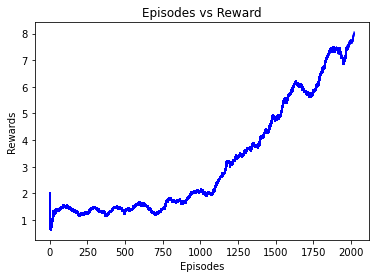

In [ ]:
rewards, episodes = [], []
best_eval_reward = 0
halt_flag = 0

for e in range(EPISODES):
    done = False
    score = 0

    history = np.zeros([5, 84, 84], dtype=np.uint8)
    step = 0
    state, _ = env.reset()
    next_state = state
    life = number_lives

    get_init_state(history, state, HISTORY_SIZE)

    while not done:
        step += 1
        frame += 1

        # Perform a fire action if ball is no longer on screen to continue onto next life
        if step > 1 and len(np.unique(next_state[:189] == state[:189])) < 2:
            action = torch.tensor([[0]]).cuda()
        else:
            action = agent.get_action(np.float32(history[:4, :, :]) / 255.)
#             print(action)
        state = next_state
#         next_state, reward, done, info = env.step(action + 1)
        next_state, reward, terminated, truncated, info = env.step(action + 1)
        done = terminated or truncated

        frame_next_state = get_frame(next_state)
        history[4, :, :] = frame_next_state
        terminal_state = check_live(life, info['lives'])

        life = info['lives']
        r = reward

        # Store the transition in memory
        agent.memory.push(deepcopy(frame_next_state), action.cpu(), r, terminal_state)
#         agent.memory.push(deepcopy(frame_next_state), action, r, terminal_state)
        # Start training after random sample generation
        if(frame >= train_frame): # You can set train_frame to a lower value while testing your starts training earlier
#         if frame >= 200:
            agent.train_policy_net(frame)
            # Update the target network only for Double DQN only
            if double_dqn and (frame % update_target_network_frequency)== 0:
                agent.update_target_net()
        score += reward
        history[:4, :, :] = history[1:, :, :]

        if done:
            evaluation_reward.append(score)
            rewards.append(np.mean(evaluation_reward))
            episodes.append(e)
            pylab.plot(episodes, rewards, 'b')
            pylab.xlabel('Episodes')
            pylab.ylabel('Rewards')
            pylab.title('Episodes vs Reward')
            pylab.savefig("./save_graph/breakout_dqn.png") # save graph for training visualization

            # every episode, plot the play time
            print("episode:", e, "  score:", score, "  memory length:",
                  len(agent.memory), "  epsilon:", agent.epsilon, "   steps:", step,
                  "   lr:", agent.optimizer.param_groups[0]['lr'], "    evaluation reward:", np.mean(evaluation_reward))

            # if the mean of scores of last 100 episode is bigger than 5 save model
            ### Change this save condition to whatever you prefer ###
            if np.mean(evaluation_reward) > 8.0 and np.mean(evaluation_reward) > best_eval_reward:
                torch.save(agent.policy_net, "./save_model/breakout_dqn.pth")
                best_eval_reward = np.mean(evaluation_reward)
                if np.mean(evaluation_reward) > 8.2:
                    halt_flag = 1
                    break
    if halt_flag == 1:
        break


episode: 0   score: 10.0   memory length: 508684   epsilon: 0.19080370000889824    steps: 526    lr: 2.560000000000001e-06     evaluation reward: 8.06
episode: 1   score: 5.0   memory length: 509009   epsilon: 0.19016020000889416    steps: 325    lr: 2.560000000000001e-06     evaluation reward: 7.99
episode: 2   score: 6.0   memory length: 509346   epsilon: 0.18949294000888994    steps: 337    lr: 2.560000000000001e-06     evaluation reward: 7.94
episode: 3   score: 5.0   memory length: 509653   epsilon: 0.1888850800088861    steps: 307    lr: 2.560000000000001e-06     evaluation reward: 7.88
episode: 4   score: 8.0   memory length: 510129   epsilon: 0.18794260000888013    steps: 476    lr: 2.560000000000001e-06     evaluation reward: 7.9
episode: 5   score: 7.0   memory length: 510504   epsilon: 0.18720010000887544    steps: 375    lr: 2.560000000000001e-06     evaluation reward: 7.91
episode: 6   score: 12.0   memory length: 510960   epsilon: 0.18629722000886972    steps: 456    lr: 

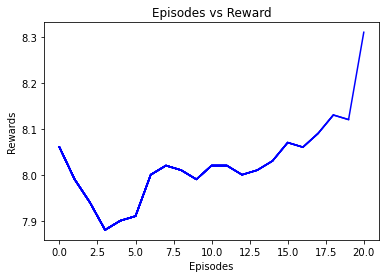

In [ ]:
rewards, episodes = [], []
best_eval_reward = 0
halt_flag = 0

for e in range(EPISODES):
    done = False
    score = 0

    history = np.zeros([5, 84, 84], dtype=np.uint8)
    step = 0
    state, _ = env.reset()
    next_state = state
    life = number_lives

    get_init_state(history, state, HISTORY_SIZE)

    while not done:
        step += 1
        frame += 1

        # Perform a fire action if ball is no longer on screen to continue onto next life
        if step > 1 and len(np.unique(next_state[:189] == state[:189])) < 2:
            action = torch.tensor([[0]]).cuda()
        else:
            action = agent.get_action(np.float32(history[:4, :, :]) / 255.)
#             print(action)
        state = next_state
#         next_state, reward, done, info = env.step(action + 1)
        next_state, reward, terminated, truncated, info = env.step(action + 1)
        done = terminated or truncated

        frame_next_state = get_frame(next_state)
        history[4, :, :] = frame_next_state
        terminal_state = check_live(life, info['lives'])

        life = info['lives']
        r = reward

        # Store the transition in memory
        agent.memory.push(deepcopy(frame_next_state), action.cpu(), r, terminal_state)
#         agent.memory.push(deepcopy(frame_next_state), action, r, terminal_state)
        # Start training after random sample generation
        if(frame >= train_frame): # You can set train_frame to a lower value while testing your starts training earlier
#         if frame >= 200:
            agent.train_policy_net(frame)
            # Update the target network only for Double DQN only
            if double_dqn and (frame % update_target_network_frequency)== 0:
                agent.update_target_net()
        score += reward
        history[:4, :, :] = history[1:, :, :]

        if done:
            evaluation_reward.append(score)
            rewards.append(np.mean(evaluation_reward))
            episodes.append(e)
            pylab.plot(episodes, rewards, 'b')
            pylab.xlabel('Episodes')
            pylab.ylabel('Rewards')
            pylab.title('Episodes vs Reward')
            pylab.savefig("./save_graph/breakout_dqn.png") # save graph for training visualization

            # every episode, plot the play time
            print("episode:", e, "  score:", score, "  memory length:",
                  len(agent.memory), "  epsilon:", agent.epsilon, "   steps:", step,
                  "   lr:", agent.optimizer.param_groups[0]['lr'], "    evaluation reward:", np.mean(evaluation_reward))

            # if the mean of scores of last 100 episode is bigger than 5 save model
            ### Change this save condition to whatever you prefer ###
            if np.mean(evaluation_reward) > 8.0 and np.mean(evaluation_reward) > best_eval_reward:
                torch.save(agent.policy_net, "./save_model/breakout_dqn.pth")
                best_eval_reward = np.mean(evaluation_reward)
                if np.mean(evaluation_reward) > 8.2:
                    halt_flag = 1
                    break
    if halt_flag == 1:
        break

In [ ]:
torch.save(agent.policy_net, "./save_model/breakout_dqn_latest.pth")

## Double DQN Agent

In [ ]:
double_dqn = True # set to True if using double DQN agent

if double_dqn:
    from agent_double import Agent
else:
    from agent import Agent

agent = Agent(action_size)
evaluation_reward = deque(maxlen=evaluation_reward_length)
frame = 0
memory_size = 0

episode: 0   score: 0.0   memory length: 122   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 0.0
episode: 1   score: 2.0   memory length: 340   epsilon: 1.0    steps: 218    lr: 0.0001     evaluation reward: 1.0
episode: 2   score: 0.0   memory length: 462   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 0.6666666666666666
episode: 3   score: 1.0   memory length: 630   epsilon: 1.0    steps: 168    lr: 0.0001     evaluation reward: 0.75
episode: 4   score: 1.0   memory length: 802   epsilon: 1.0    steps: 172    lr: 0.0001     evaluation reward: 0.8
episode: 5   score: 1.0   memory length: 971   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 0.8333333333333334
episode: 6   score: 1.0   memory length: 1140   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 0.8571428571428571
episode: 7   score: 0.0   memory length: 1263   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 0.75
episode: 8   score: 0.0   memor

episode: 64   score: 2.0   memory length: 12011   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 1.4923076923076923
episode: 65   score: 2.0   memory length: 12227   epsilon: 1.0    steps: 216    lr: 0.0001     evaluation reward: 1.5
episode: 66   score: 4.0   memory length: 12503   epsilon: 1.0    steps: 276    lr: 0.0001     evaluation reward: 1.537313432835821
episode: 67   score: 1.0   memory length: 12672   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.5294117647058822
episode: 68   score: 1.0   memory length: 12840   epsilon: 1.0    steps: 168    lr: 0.0001     evaluation reward: 1.5217391304347827
episode: 69   score: 0.0   memory length: 12962   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.5
episode: 70   score: 1.0   memory length: 13133   epsilon: 1.0    steps: 171    lr: 0.0001     evaluation reward: 1.4929577464788732
episode: 71   score: 2.0   memory length: 13330   epsilon: 1.0    steps: 197    lr: 0.0001     evalu

episode: 130   score: 0.0   memory length: 23186   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.35
episode: 131   score: 0.0   memory length: 23308   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.31
episode: 132   score: 1.0   memory length: 23459   epsilon: 1.0    steps: 151    lr: 0.0001     evaluation reward: 1.29
episode: 133   score: 0.0   memory length: 23582   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.29
episode: 134   score: 1.0   memory length: 23751   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.28
episode: 135   score: 0.0   memory length: 23874   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.22
episode: 136   score: 0.0   memory length: 23997   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.22
episode: 137   score: 1.0   memory length: 24147   epsilon: 1.0    steps: 150    lr: 0.0001     evaluation reward: 1.21
episode: 138   score: 1.0   memory lengt

episode: 199   score: 1.0   memory length: 35308   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.18
episode: 200   score: 1.0   memory length: 35477   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.18
episode: 201   score: 6.0   memory length: 35807   epsilon: 1.0    steps: 330    lr: 0.0001     evaluation reward: 1.24
episode: 202   score: 0.0   memory length: 35930   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.24
episode: 203   score: 0.0   memory length: 36053   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.24
episode: 204   score: 0.0   memory length: 36176   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.22
episode: 205   score: 0.0   memory length: 36299   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.21
episode: 206   score: 3.0   memory length: 36563   epsilon: 1.0    steps: 264    lr: 0.0001     evaluation reward: 1.24
episode: 207   score: 4.0   memory lengt

episode: 268   score: 4.0   memory length: 48882   epsilon: 1.0    steps: 299    lr: 0.0001     evaluation reward: 1.7
episode: 269   score: 3.0   memory length: 49127   epsilon: 1.0    steps: 245    lr: 0.0001     evaluation reward: 1.71
episode: 270   score: 3.0   memory length: 49392   epsilon: 1.0    steps: 265    lr: 0.0001     evaluation reward: 1.73
episode: 271   score: 0.0   memory length: 49515   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.73
episode: 272   score: 1.0   memory length: 49665   epsilon: 1.0    steps: 150    lr: 0.0001     evaluation reward: 1.73
episode: 273   score: 0.0   memory length: 49788   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.73
episode: 274   score: 5.0   memory length: 50113   epsilon: 1.0    steps: 325    lr: 0.0001     evaluation reward: 1.77
episode: 275   score: 0.0   memory length: 50235   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.74
episode: 276   score: 0.0   memory length

episode: 337   score: 2.0   memory length: 62299   epsilon: 1.0    steps: 179    lr: 0.0001     evaluation reward: 1.9
episode: 338   score: 5.0   memory length: 62619   epsilon: 1.0    steps: 320    lr: 0.0001     evaluation reward: 1.94
episode: 339   score: 2.0   memory length: 62817   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 1.93
episode: 340   score: 3.0   memory length: 63062   epsilon: 1.0    steps: 245    lr: 0.0001     evaluation reward: 1.93
episode: 341   score: 0.0   memory length: 63185   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.92
episode: 342   score: 2.0   memory length: 63403   epsilon: 1.0    steps: 218    lr: 0.0001     evaluation reward: 1.92
episode: 343   score: 4.0   memory length: 63675   epsilon: 1.0    steps: 272    lr: 0.0001     evaluation reward: 1.95
episode: 344   score: 0.0   memory length: 63798   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.93
episode: 345   score: 1.0   memory length

episode: 406   score: 1.0   memory length: 74886   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.58
episode: 407   score: 1.0   memory length: 75037   epsilon: 1.0    steps: 151    lr: 0.0001     evaluation reward: 1.58
episode: 408   score: 12.0   memory length: 75374   epsilon: 1.0    steps: 337    lr: 0.0001     evaluation reward: 1.67
episode: 409   score: 1.0   memory length: 75525   epsilon: 1.0    steps: 151    lr: 0.0001     evaluation reward: 1.68
episode: 410   score: 1.0   memory length: 75675   epsilon: 1.0    steps: 150    lr: 0.0001     evaluation reward: 1.65
episode: 411   score: 3.0   memory length: 75923   epsilon: 1.0    steps: 248    lr: 0.0001     evaluation reward: 1.68
episode: 412   score: 1.0   memory length: 76074   epsilon: 1.0    steps: 151    lr: 0.0001     evaluation reward: 1.66
episode: 413   score: 2.0   memory length: 76273   epsilon: 1.0    steps: 199    lr: 0.0001     evaluation reward: 1.64
episode: 414   score: 2.0   memory leng

episode: 475   score: 2.0   memory length: 87498   epsilon: 1.0    steps: 199    lr: 0.0001     evaluation reward: 1.46
episode: 476   score: 2.0   memory length: 87718   epsilon: 1.0    steps: 220    lr: 0.0001     evaluation reward: 1.46
episode: 477   score: 2.0   memory length: 87919   epsilon: 1.0    steps: 201    lr: 0.0001     evaluation reward: 1.48
episode: 478   score: 1.0   memory length: 88088   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.49
episode: 479   score: 2.0   memory length: 88286   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 1.46
episode: 480   score: 0.0   memory length: 88409   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.45
episode: 481   score: 0.0   memory length: 88531   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.42
episode: 482   score: 4.0   memory length: 88828   epsilon: 1.0    steps: 297    lr: 0.0001     evaluation reward: 1.44
episode: 483   score: 2.0   memory lengt

episode: 544   score: 3.0   memory length: 99597   epsilon: 1.0    steps: 248    lr: 0.0001     evaluation reward: 1.38
episode: 545   score: 0.0   memory length: 99719   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.37
episode: 546   score: 4.0   memory length: 99995   epsilon: 1.0    steps: 276    lr: 0.0001     evaluation reward: 1.4


/u/qilong/QA_generator/CS444/mp5/memory.py:30: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  sample = np.array(sample, dtype=object)
/u/qilong/QA_generator/CS444/mp5/agent_double.py:74: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array crea

episode: 547   score: 1.0   memory length: 100145   epsilon: 0.9997109200000063    steps: 150    lr: 0.0001     evaluation reward: 1.41
episode: 548   score: 1.0   memory length: 100313   epsilon: 0.9993782800000135    steps: 168    lr: 0.0001     evaluation reward: 1.4
episode: 549   score: 1.0   memory length: 100481   epsilon: 0.9990456400000207    steps: 168    lr: 0.0001     evaluation reward: 1.4
episode: 550   score: 0.0   memory length: 100604   epsilon: 0.998802100000026    steps: 123    lr: 0.0001     evaluation reward: 1.37
episode: 551   score: 1.0   memory length: 100774   epsilon: 0.9984655000000333    steps: 170    lr: 0.0001     evaluation reward: 1.38
episode: 552   score: 2.0   memory length: 100976   epsilon: 0.998065540000042    steps: 202    lr: 0.0001     evaluation reward: 1.37
episode: 553   score: 0.0   memory length: 101099   epsilon: 0.9978220000000473    steps: 123    lr: 0.0001     evaluation reward: 1.35
episode: 554   score: 0.0   memory length: 101222   

episode: 608   score: 0.0   memory length: 111202   epsilon: 0.9778180600004815    steps: 123    lr: 0.0001     evaluation reward: 1.4
episode: 609   score: 2.0   memory length: 111400   epsilon: 0.9774260200004901    steps: 198    lr: 0.0001     evaluation reward: 1.42
episode: 610   score: 2.0   memory length: 111619   epsilon: 0.9769924000004995    steps: 219    lr: 0.0001     evaluation reward: 1.44
episode: 611   score: 0.0   memory length: 111742   epsilon: 0.9767488600005048    steps: 123    lr: 0.0001     evaluation reward: 1.43
episode: 612   score: 2.0   memory length: 111958   epsilon: 0.976321180000514    steps: 216    lr: 0.0001     evaluation reward: 1.42
episode: 613   score: 3.0   memory length: 112224   epsilon: 0.9757945000005255    steps: 266    lr: 0.0001     evaluation reward: 1.44
episode: 614   score: 0.0   memory length: 112347   epsilon: 0.9755509600005308    steps: 123    lr: 0.0001     evaluation reward: 1.44
episode: 615   score: 0.0   memory length: 112470 

episode: 669   score: 1.0   memory length: 122710   epsilon: 0.9550322200009762    steps: 150    lr: 0.0001     evaluation reward: 1.53
episode: 670   score: 2.0   memory length: 122928   epsilon: 0.9546005800009856    steps: 218    lr: 0.0001     evaluation reward: 1.55
episode: 671   score: 2.0   memory length: 123127   epsilon: 0.9542065600009941    steps: 199    lr: 0.0001     evaluation reward: 1.56
episode: 672   score: 4.0   memory length: 123424   epsilon: 0.9536185000010069    steps: 297    lr: 0.0001     evaluation reward: 1.58
episode: 673   score: 0.0   memory length: 123547   epsilon: 0.9533749600010122    steps: 123    lr: 0.0001     evaluation reward: 1.58
episode: 674   score: 0.0   memory length: 123670   epsilon: 0.9531314200010175    steps: 123    lr: 0.0001     evaluation reward: 1.58
episode: 675   score: 2.0   memory length: 123850   epsilon: 0.9527750200010252    steps: 180    lr: 0.0001     evaluation reward: 1.6
episode: 676   score: 0.0   memory length: 123973

episode: 730   score: 2.0   memory length: 133951   epsilon: 0.9327750400014594    steps: 197    lr: 0.0001     evaluation reward: 1.61
episode: 731   score: 0.0   memory length: 134074   epsilon: 0.9325315000014647    steps: 123    lr: 0.0001     evaluation reward: 1.6
episode: 732   score: 0.0   memory length: 134197   epsilon: 0.93228796000147    steps: 123    lr: 0.0001     evaluation reward: 1.6
episode: 733   score: 0.0   memory length: 134320   epsilon: 0.9320444200014752    steps: 123    lr: 0.0001     evaluation reward: 1.56
episode: 734   score: 2.0   memory length: 134519   epsilon: 0.9316504000014838    steps: 199    lr: 0.0001     evaluation reward: 1.58
episode: 735   score: 0.0   memory length: 134642   epsilon: 0.9314068600014891    steps: 123    lr: 0.0001     evaluation reward: 1.58
episode: 736   score: 3.0   memory length: 134868   epsilon: 0.9309593800014988    steps: 226    lr: 0.0001     evaluation reward: 1.58
episode: 737   score: 0.0   memory length: 134990   

episode: 791   score: 1.0   memory length: 145788   epsilon: 0.9093377800019682    steps: 171    lr: 0.0001     evaluation reward: 1.71
episode: 792   score: 2.0   memory length: 145986   epsilon: 0.9089457400019767    steps: 198    lr: 0.0001     evaluation reward: 1.71
episode: 793   score: 1.0   memory length: 146156   epsilon: 0.908609140001984    steps: 170    lr: 0.0001     evaluation reward: 1.71
episode: 794   score: 2.0   memory length: 146371   epsilon: 0.9081834400019932    steps: 215    lr: 0.0001     evaluation reward: 1.7
episode: 795   score: 4.0   memory length: 146664   epsilon: 0.9076033000020058    steps: 293    lr: 0.0001     evaluation reward: 1.74
episode: 796   score: 1.0   memory length: 146814   epsilon: 0.9073063000020123    steps: 150    lr: 0.0001     evaluation reward: 1.73
episode: 797   score: 1.0   memory length: 146965   epsilon: 0.9070073200020188    steps: 151    lr: 0.0001     evaluation reward: 1.7
episode: 798   score: 1.0   memory length: 147136  

episode: 852   score: 2.0   memory length: 158490   epsilon: 0.8841878200025142    steps: 198    lr: 0.0001     evaluation reward: 1.98
episode: 853   score: 2.0   memory length: 158689   epsilon: 0.8837938000025227    steps: 199    lr: 0.0001     evaluation reward: 1.99
episode: 854   score: 4.0   memory length: 158987   epsilon: 0.8832037600025355    steps: 298    lr: 0.0001     evaluation reward: 2.03
episode: 855   score: 7.0   memory length: 159409   epsilon: 0.8823682000025537    steps: 422    lr: 0.0001     evaluation reward: 2.07
episode: 856   score: 0.0   memory length: 159532   epsilon: 0.882124660002559    steps: 123    lr: 0.0001     evaluation reward: 2.06
episode: 857   score: 5.0   memory length: 159860   epsilon: 0.8814752200025731    steps: 328    lr: 0.0001     evaluation reward: 2.09
episode: 858   score: 5.0   memory length: 160222   epsilon: 0.8807584600025886    steps: 362    lr: 0.0001     evaluation reward: 2.11
episode: 859   score: 1.0   memory length: 160391

episode: 913   score: 4.0   memory length: 171258   epsilon: 0.858907180003063    steps: 275    lr: 0.0001     evaluation reward: 2.19
episode: 914   score: 1.0   memory length: 171409   epsilon: 0.8586082000030695    steps: 151    lr: 0.0001     evaluation reward: 2.2
episode: 915   score: 2.0   memory length: 171607   epsilon: 0.858216160003078    steps: 198    lr: 0.0001     evaluation reward: 2.19
episode: 916   score: 4.0   memory length: 171882   epsilon: 0.8576716600030898    steps: 275    lr: 0.0001     evaluation reward: 2.21
episode: 917   score: 0.0   memory length: 172005   epsilon: 0.8574281200030951    steps: 123    lr: 0.0001     evaluation reward: 2.19
episode: 918   score: 3.0   memory length: 172230   epsilon: 0.8569826200031048    steps: 225    lr: 0.0001     evaluation reward: 2.2
episode: 919   score: 4.0   memory length: 172504   epsilon: 0.8564401000031165    steps: 274    lr: 0.0001     evaluation reward: 2.22
episode: 920   score: 5.0   memory length: 172848   

episode: 974   score: 0.0   memory length: 184411   epsilon: 0.8328642400036284    steps: 123    lr: 0.0001     evaluation reward: 2.23
episode: 975   score: 2.0   memory length: 184609   epsilon: 0.8324722000036369    steps: 198    lr: 0.0001     evaluation reward: 2.21
episode: 976   score: 1.0   memory length: 184760   epsilon: 0.8321732200036434    steps: 151    lr: 0.0001     evaluation reward: 2.18
episode: 977   score: 11.0   memory length: 185230   epsilon: 0.8312426200036636    steps: 470    lr: 0.0001     evaluation reward: 2.28
episode: 978   score: 3.0   memory length: 185477   epsilon: 0.8307535600036742    steps: 247    lr: 0.0001     evaluation reward: 2.29
episode: 979   score: 3.0   memory length: 185687   epsilon: 0.8303377600036832    steps: 210    lr: 0.0001     evaluation reward: 2.3
episode: 980   score: 4.0   memory length: 185965   epsilon: 0.8297873200036952    steps: 278    lr: 0.0001     evaluation reward: 2.32
episode: 981   score: 1.0   memory length: 18611

episode: 1035   score: 2.0   memory length: 198029   epsilon: 0.8059006000042137    steps: 217    lr: 0.0001     evaluation reward: 2.4
episode: 1036   score: 1.0   memory length: 198198   epsilon: 0.805565980004221    steps: 169    lr: 0.0001     evaluation reward: 2.38
episode: 1037   score: 2.0   memory length: 198377   epsilon: 0.8052115600042287    steps: 179    lr: 0.0001     evaluation reward: 2.37
episode: 1038   score: 1.0   memory length: 198549   epsilon: 0.8048710000042361    steps: 172    lr: 0.0001     evaluation reward: 2.36
episode: 1039   score: 3.0   memory length: 198777   epsilon: 0.8044195600042459    steps: 228    lr: 0.0001     evaluation reward: 2.38
episode: 1040   score: 2.0   memory length: 198960   epsilon: 0.8040572200042537    steps: 183    lr: 0.0001     evaluation reward: 2.38
episode: 1041   score: 0.0   memory length: 199083   epsilon: 0.803813680004259    steps: 123    lr: 0.0001     evaluation reward: 2.36
episode: 1042   score: 6.0   memory length: 

episode: 1096   score: 1.0   memory length: 213971   epsilon: 0.774335440004899    steps: 171    lr: 4e-05     evaluation reward: 3.09
episode: 1097   score: 1.0   memory length: 214142   epsilon: 0.7739968600049063    steps: 171    lr: 4e-05     evaluation reward: 3.07
episode: 1098   score: 2.0   memory length: 214339   epsilon: 0.7736068000049148    steps: 197    lr: 4e-05     evaluation reward: 3.09
episode: 1099   score: 3.0   memory length: 214565   epsilon: 0.7731593200049245    steps: 226    lr: 4e-05     evaluation reward: 3.08
episode: 1100   score: 3.0   memory length: 214791   epsilon: 0.7727118400049342    steps: 226    lr: 4e-05     evaluation reward: 3.09
episode: 1101   score: 2.0   memory length: 214989   epsilon: 0.7723198000049427    steps: 198    lr: 4e-05     evaluation reward: 3.09
episode: 1102   score: 3.0   memory length: 215216   epsilon: 0.7718703400049525    steps: 227    lr: 4e-05     evaluation reward: 3.11
episode: 1103   score: 2.0   memory length: 21541

episode: 1157   score: 4.0   memory length: 230245   epsilon: 0.7421129200055985    steps: 297    lr: 4e-05     evaluation reward: 3.71
episode: 1158   score: 4.0   memory length: 230540   epsilon: 0.7415288200056112    steps: 295    lr: 4e-05     evaluation reward: 3.7
episode: 1159   score: 2.0   memory length: 230760   epsilon: 0.7410932200056206    steps: 220    lr: 4e-05     evaluation reward: 3.65
episode: 1160   score: 4.0   memory length: 231005   epsilon: 0.7406081200056311    steps: 245    lr: 4e-05     evaluation reward: 3.67
episode: 1161   score: 1.0   memory length: 231176   epsilon: 0.7402695400056385    steps: 171    lr: 4e-05     evaluation reward: 3.64
episode: 1162   score: 3.0   memory length: 231406   epsilon: 0.7398141400056484    steps: 230    lr: 4e-05     evaluation reward: 3.65
episode: 1163   score: 9.0   memory length: 231823   epsilon: 0.7389884800056663    steps: 417    lr: 4e-05     evaluation reward: 3.72
episode: 1164   score: 4.0   memory length: 23209

episode: 1218   score: 5.0   memory length: 246217   epsilon: 0.710488360006285    steps: 320    lr: 4e-05     evaluation reward: 3.82
episode: 1219   score: 6.0   memory length: 246607   epsilon: 0.7097161600063018    steps: 390    lr: 4e-05     evaluation reward: 3.85
episode: 1220   score: 3.0   memory length: 246852   epsilon: 0.7092310600063123    steps: 245    lr: 4e-05     evaluation reward: 3.82
episode: 1221   score: 2.0   memory length: 247052   epsilon: 0.7088350600063209    steps: 200    lr: 4e-05     evaluation reward: 3.82
episode: 1222   score: 6.0   memory length: 247398   epsilon: 0.7081499800063358    steps: 346    lr: 4e-05     evaluation reward: 3.78
episode: 1223   score: 4.0   memory length: 247676   epsilon: 0.7075995400063477    steps: 278    lr: 4e-05     evaluation reward: 3.77
episode: 1224   score: 3.0   memory length: 247922   epsilon: 0.7071124600063583    steps: 246    lr: 4e-05     evaluation reward: 3.75
episode: 1225   score: 4.0   memory length: 24822

episode: 1279   score: 1.0   memory length: 262519   epsilon: 0.6782104000069857    steps: 151    lr: 4e-05     evaluation reward: 3.65
episode: 1280   score: 2.0   memory length: 262718   epsilon: 0.6778163800069943    steps: 199    lr: 4e-05     evaluation reward: 3.63
episode: 1281   score: 2.0   memory length: 262918   epsilon: 0.6774203800070029    steps: 200    lr: 4e-05     evaluation reward: 3.62
episode: 1282   score: 7.0   memory length: 263320   epsilon: 0.6766244200070202    steps: 402    lr: 4e-05     evaluation reward: 3.66
episode: 1283   score: 1.0   memory length: 263470   epsilon: 0.6763274200070266    steps: 150    lr: 4e-05     evaluation reward: 3.64
episode: 1284   score: 2.0   memory length: 263668   epsilon: 0.6759353800070351    steps: 198    lr: 4e-05     evaluation reward: 3.62
episode: 1285   score: 6.0   memory length: 264062   epsilon: 0.6751552600070521    steps: 394    lr: 4e-05     evaluation reward: 3.61
episode: 1286   score: 0.0   memory length: 2641

episode: 1340   score: 5.0   memory length: 279728   epsilon: 0.6441365800077254    steps: 338    lr: 4e-05     evaluation reward: 3.87
episode: 1341   score: 1.0   memory length: 279878   epsilon: 0.6438395800077319    steps: 150    lr: 4e-05     evaluation reward: 3.85
episode: 1342   score: 3.0   memory length: 280106   epsilon: 0.6433881400077417    steps: 228    lr: 4e-05     evaluation reward: 3.82
episode: 1343   score: 8.0   memory length: 280559   epsilon: 0.6424912000077612    steps: 453    lr: 4e-05     evaluation reward: 3.87
episode: 1344   score: 8.0   memory length: 280990   epsilon: 0.6416378200077797    steps: 431    lr: 4e-05     evaluation reward: 3.86
episode: 1345   score: 3.0   memory length: 281216   epsilon: 0.6411903400077894    steps: 226    lr: 4e-05     evaluation reward: 3.84
episode: 1346   score: 4.0   memory length: 281476   epsilon: 0.6406755400078006    steps: 260    lr: 4e-05     evaluation reward: 3.86
episode: 1347   score: 2.0   memory length: 2816

episode: 1401   score: 3.0   memory length: 296862   epsilon: 0.6102112600084619    steps: 210    lr: 4e-05     evaluation reward: 4.12
episode: 1402   score: 6.0   memory length: 297225   epsilon: 0.6094925200084775    steps: 363    lr: 4e-05     evaluation reward: 4.12
episode: 1403   score: 5.0   memory length: 297552   epsilon: 0.6088450600084916    steps: 327    lr: 4e-05     evaluation reward: 4.15
episode: 1404   score: 6.0   memory length: 297911   epsilon: 0.608134240008507    steps: 359    lr: 4e-05     evaluation reward: 4.16
episode: 1405   score: 4.0   memory length: 298190   epsilon: 0.607581820008519    steps: 279    lr: 4e-05     evaluation reward: 4.18
episode: 1406   score: 3.0   memory length: 298437   epsilon: 0.6070927600085296    steps: 247    lr: 4e-05     evaluation reward: 4.14
episode: 1407   score: 7.0   memory length: 298812   epsilon: 0.6063502600085457    steps: 375    lr: 4e-05     evaluation reward: 4.17
episode: 1408   score: 3.0   memory length: 299057

episode: 1456   score: 5.0   memory length: 313526   epsilon: 0.5772165400091782    steps: 344    lr: 1.6000000000000003e-05     evaluation reward: 4.51
episode: 1457   score: 5.0   memory length: 313869   epsilon: 0.576537400009193    steps: 343    lr: 1.6000000000000003e-05     evaluation reward: 4.52
episode: 1458   score: 5.0   memory length: 314184   epsilon: 0.5759137000092065    steps: 315    lr: 1.6000000000000003e-05     evaluation reward: 4.53
episode: 1459   score: 10.0   memory length: 314725   epsilon: 0.5748425200092298    steps: 541    lr: 1.6000000000000003e-05     evaluation reward: 4.54
episode: 1460   score: 6.0   memory length: 315063   epsilon: 0.5741732800092443    steps: 338    lr: 1.6000000000000003e-05     evaluation reward: 4.54
episode: 1461   score: 6.0   memory length: 315412   epsilon: 0.5734822600092593    steps: 349    lr: 1.6000000000000003e-05     evaluation reward: 4.58
episode: 1462   score: 9.0   memory length: 315850   epsilon: 0.5726150200092781  

episode: 1510   score: 5.0   memory length: 330836   epsilon: 0.5429427400099223    steps: 344    lr: 1.6000000000000003e-05     evaluation reward: 4.99
episode: 1511   score: 2.0   memory length: 331054   epsilon: 0.5425111000099316    steps: 218    lr: 1.6000000000000003e-05     evaluation reward: 4.96
episode: 1512   score: 3.0   memory length: 331267   epsilon: 0.5420893600099408    steps: 213    lr: 1.6000000000000003e-05     evaluation reward: 4.93
episode: 1513   score: 12.0   memory length: 331769   epsilon: 0.5410954000099624    steps: 502    lr: 1.6000000000000003e-05     evaluation reward: 5.0
episode: 1514   score: 5.0   memory length: 332059   epsilon: 0.5405212000099748    steps: 290    lr: 1.6000000000000003e-05     evaluation reward: 5.01
episode: 1515   score: 5.0   memory length: 332349   epsilon: 0.5399470000099873    steps: 290    lr: 1.6000000000000003e-05     evaluation reward: 4.99
episode: 1516   score: 8.0   memory length: 332803   epsilon: 0.5390480800100068  

episode: 1564   score: 11.0   memory length: 348797   epsilon: 0.5073799600106943    steps: 480    lr: 1.6000000000000003e-05     evaluation reward: 5.28
episode: 1565   score: 8.0   memory length: 349257   epsilon: 0.5064691600107141    steps: 460    lr: 1.6000000000000003e-05     evaluation reward: 5.33
episode: 1566   score: 4.0   memory length: 349534   epsilon: 0.505920700010726    steps: 277    lr: 1.6000000000000003e-05     evaluation reward: 5.27
episode: 1567   score: 7.0   memory length: 349936   epsilon: 0.5051247400107433    steps: 402    lr: 1.6000000000000003e-05     evaluation reward: 5.31
episode: 1568   score: 4.0   memory length: 350195   epsilon: 0.5046119200107544    steps: 259    lr: 1.6000000000000003e-05     evaluation reward: 5.29
episode: 1569   score: 3.0   memory length: 350444   epsilon: 0.5041189000107651    steps: 249    lr: 1.6000000000000003e-05     evaluation reward: 5.23
episode: 1570   score: 6.0   memory length: 350785   epsilon: 0.5034437200107797  

episode: 1618   score: 3.0   memory length: 368267   epsilon: 0.4688293600106573    steps: 227    lr: 1.6000000000000003e-05     evaluation reward: 5.95
episode: 1619   score: 14.0   memory length: 368844   epsilon: 0.46768690001065005    steps: 577    lr: 1.6000000000000003e-05     evaluation reward: 6.05
episode: 1620   score: 1.0   memory length: 368995   epsilon: 0.46738792001064816    steps: 151    lr: 1.6000000000000003e-05     evaluation reward: 5.99
episode: 1621   score: 9.0   memory length: 369467   epsilon: 0.46645336001064225    steps: 472    lr: 1.6000000000000003e-05     evaluation reward: 6.01
episode: 1622   score: 6.0   memory length: 369845   epsilon: 0.4657049200106375    steps: 378    lr: 1.6000000000000003e-05     evaluation reward: 6.04
episode: 1623   score: 9.0   memory length: 370303   epsilon: 0.4647980800106318    steps: 458    lr: 1.6000000000000003e-05     evaluation reward: 6.1
episode: 1624   score: 6.0   memory length: 370659   epsilon: 0.464093200010627

episode: 1672   score: 7.0   memory length: 388572   epsilon: 0.4286254600104029    steps: 406    lr: 1.6000000000000003e-05     evaluation reward: 6.67
episode: 1673   score: 8.0   memory length: 388988   epsilon: 0.4278017800103977    steps: 416    lr: 1.6000000000000003e-05     evaluation reward: 6.68
episode: 1674   score: 6.0   memory length: 389340   epsilon: 0.4271048200103933    steps: 352    lr: 1.6000000000000003e-05     evaluation reward: 6.68
episode: 1675   score: 6.0   memory length: 389680   epsilon: 0.42643162001038903    steps: 340    lr: 1.6000000000000003e-05     evaluation reward: 6.67
episode: 1676   score: 7.0   memory length: 390079   epsilon: 0.42564160001038404    steps: 399    lr: 1.6000000000000003e-05     evaluation reward: 6.72
episode: 1677   score: 7.0   memory length: 390504   epsilon: 0.4248001000103787    steps: 425    lr: 1.6000000000000003e-05     evaluation reward: 6.71
episode: 1678   score: 3.0   memory length: 390715   epsilon: 0.4243823200103760

episode: 1726   score: 6.0   memory length: 408019   epsilon: 0.3901204000101593    steps: 370    lr: 6.400000000000001e-06     evaluation reward: 6.48
episode: 1727   score: 11.0   memory length: 408399   epsilon: 0.38936800001015454    steps: 380    lr: 6.400000000000001e-06     evaluation reward: 6.53
episode: 1728   score: 6.0   memory length: 408736   epsilon: 0.3887007400101503    steps: 337    lr: 6.400000000000001e-06     evaluation reward: 6.53
episode: 1729   score: 7.0   memory length: 409116   epsilon: 0.38794834001014555    steps: 380    lr: 6.400000000000001e-06     evaluation reward: 6.53
episode: 1730   score: 4.0   memory length: 409375   epsilon: 0.3874355200101423    steps: 259    lr: 6.400000000000001e-06     evaluation reward: 6.53
episode: 1731   score: 8.0   memory length: 409796   epsilon: 0.38660194001013704    steps: 421    lr: 6.400000000000001e-06     evaluation reward: 6.54
episode: 1732   score: 6.0   memory length: 410128   epsilon: 0.3859445800101329    

episode: 1780   score: 8.0   memory length: 429157   epsilon: 0.3482671600098945    steps: 474    lr: 6.400000000000001e-06     evaluation reward: 6.88
episode: 1781   score: 10.0   memory length: 429513   epsilon: 0.34756228000989003    steps: 356    lr: 6.400000000000001e-06     evaluation reward: 6.91
episode: 1782   score: 8.0   memory length: 429895   epsilon: 0.34680592000988525    steps: 382    lr: 6.400000000000001e-06     evaluation reward: 6.92
episode: 1783   score: 4.0   memory length: 430137   epsilon: 0.3463267600098822    steps: 242    lr: 6.400000000000001e-06     evaluation reward: 6.93
episode: 1784   score: 10.0   memory length: 430707   epsilon: 0.3451981600098751    steps: 570    lr: 6.400000000000001e-06     evaluation reward: 6.99
episode: 1785   score: 6.0   memory length: 431060   epsilon: 0.34449922000987065    steps: 353    lr: 6.400000000000001e-06     evaluation reward: 6.98
episode: 1786   score: 12.0   memory length: 431507   epsilon: 0.34361416000986506 

episode: 1834   score: 7.0   memory length: 449186   epsilon: 0.3086097400096436    steps: 369    lr: 6.400000000000001e-06     evaluation reward: 7.17
episode: 1835   score: 3.0   memory length: 449399   epsilon: 0.3081880000096409    steps: 213    lr: 6.400000000000001e-06     evaluation reward: 7.11
episode: 1836   score: 14.0   memory length: 449928   epsilon: 0.3071405800096343    steps: 529    lr: 6.400000000000001e-06     evaluation reward: 7.19
episode: 1837   score: 4.0   memory length: 450191   epsilon: 0.306619840009631    steps: 263    lr: 6.400000000000001e-06     evaluation reward: 7.15
episode: 1838   score: 8.0   memory length: 450627   epsilon: 0.30575656000962553    steps: 436    lr: 6.400000000000001e-06     evaluation reward: 7.2
episode: 1839   score: 4.0   memory length: 450889   epsilon: 0.30523780000962225    steps: 262    lr: 6.400000000000001e-06     evaluation reward: 7.11
episode: 1840   score: 5.0   memory length: 451178   epsilon: 0.30466558000961863    st

episode: 1888   score: 11.0   memory length: 470262   epsilon: 0.26687926000937956    steps: 396    lr: 6.400000000000001e-06     evaluation reward: 7.17
episode: 1889   score: 4.0   memory length: 470520   epsilon: 0.2663684200093763    steps: 258    lr: 6.400000000000001e-06     evaluation reward: 7.11
episode: 1890   score: 7.0   memory length: 470903   epsilon: 0.26561008000937153    steps: 383    lr: 6.400000000000001e-06     evaluation reward: 7.03
episode: 1891   score: 8.0   memory length: 471289   epsilon: 0.2648458000093667    steps: 386    lr: 6.400000000000001e-06     evaluation reward: 7.07
episode: 1892   score: 7.0   memory length: 471732   epsilon: 0.26396866000936114    steps: 443    lr: 6.400000000000001e-06     evaluation reward: 7.11
episode: 1893   score: 9.0   memory length: 472194   epsilon: 0.26305390000935536    steps: 462    lr: 6.400000000000001e-06     evaluation reward: 7.17
episode: 1894   score: 4.0   memory length: 472438   epsilon: 0.2625707800093523   

episode: 1942   score: 16.0   memory length: 492563   epsilon: 0.2227232800091002    steps: 588    lr: 6.400000000000001e-06     evaluation reward: 8.0
episode: 1943   score: 10.0   memory length: 493077   epsilon: 0.22170556000909375    steps: 514    lr: 6.400000000000001e-06     evaluation reward: 8.03
episode: 1944   score: 10.0   memory length: 493595   epsilon: 0.22067992000908726    steps: 518    lr: 6.400000000000001e-06     evaluation reward: 7.96
episode: 1945   score: 6.0   memory length: 493936   epsilon: 0.220004740009083    steps: 341    lr: 6.400000000000001e-06     evaluation reward: 7.89
episode: 1946   score: 11.0   memory length: 494472   epsilon: 0.21894346000907627    steps: 536    lr: 6.400000000000001e-06     evaluation reward: 7.93
episode: 1947   score: 8.0   memory length: 494918   epsilon: 0.2180603800090707    steps: 446    lr: 6.400000000000001e-06     evaluation reward: 7.95
episode: 1948   score: 3.0   memory length: 495131   epsilon: 0.21763864000906802  

episode: 1996   score: 11.0   memory length: 515520   epsilon: 0.1772684200088126    steps: 369    lr: 2.560000000000001e-06     evaluation reward: 8.34
episode: 1997   score: 11.0   memory length: 516081   epsilon: 0.17615764000880557    steps: 561    lr: 2.560000000000001e-06     evaluation reward: 8.4
episode: 1998   score: 11.0   memory length: 516581   epsilon: 0.1751676400087993    steps: 500    lr: 2.560000000000001e-06     evaluation reward: 8.44
episode: 1999   score: 4.0   memory length: 516841   epsilon: 0.17465284000879605    steps: 260    lr: 2.560000000000001e-06     evaluation reward: 8.42
episode: 2000   score: 6.0   memory length: 517181   epsilon: 0.1739796400087918    steps: 340    lr: 2.560000000000001e-06     evaluation reward: 8.38
episode: 2001   score: 7.0   memory length: 517552   epsilon: 0.17324506000878714    steps: 371    lr: 2.560000000000001e-06     evaluation reward: 8.37
episode: 2002   score: 7.0   memory length: 517944   epsilon: 0.17246890000878223  

episode: 2050   score: 6.0   memory length: 538777   epsilon: 0.13121956000852125    steps: 361    lr: 2.560000000000001e-06     evaluation reward: 8.66
episode: 2051   score: 8.0   memory length: 539211   epsilon: 0.13036024000851582    steps: 434    lr: 2.560000000000001e-06     evaluation reward: 8.66
episode: 2052   score: 4.0   memory length: 539473   epsilon: 0.12984148000851253    steps: 262    lr: 2.560000000000001e-06     evaluation reward: 8.64
episode: 2053   score: 9.0   memory length: 539976   epsilon: 0.12884554000850623    steps: 503    lr: 2.560000000000001e-06     evaluation reward: 8.61
episode: 2054   score: 16.0   memory length: 540535   epsilon: 0.12773872000849923    steps: 559    lr: 2.560000000000001e-06     evaluation reward: 8.7
episode: 2055   score: 10.0   memory length: 540909   epsilon: 0.12699820000849454    steps: 374    lr: 2.560000000000001e-06     evaluation reward: 8.67
episode: 2056   score: 7.0   memory length: 541296   epsilon: 0.1262319400084897 

episode: 2104   score: 7.0   memory length: 562631   epsilon: 0.08398864000850988    steps: 373    lr: 2.560000000000001e-06     evaluation reward: 8.77
episode: 2105   score: 9.0   memory length: 563088   epsilon: 0.0830837800085105    steps: 457    lr: 2.560000000000001e-06     evaluation reward: 8.83
episode: 2106   score: 15.0   memory length: 563653   epsilon: 0.08196508000851126    steps: 565    lr: 2.560000000000001e-06     evaluation reward: 8.95
episode: 2107   score: 8.0   memory length: 564085   epsilon: 0.08110972000851184    steps: 432    lr: 2.560000000000001e-06     evaluation reward: 8.94
episode: 2108   score: 9.0   memory length: 564558   epsilon: 0.08017318000851248    steps: 473    lr: 2.560000000000001e-06     evaluation reward: 8.95
episode: 2109   score: 5.0   memory length: 564880   epsilon: 0.07953562000851291    steps: 322    lr: 2.560000000000001e-06     evaluation reward: 8.87
episode: 2110   score: 7.0   memory length: 565326   epsilon: 0.07865254000851352 

episode: 2158   score: 7.0   memory length: 586427   epsilon: 0.03687256000854201    steps: 353    lr: 2.560000000000001e-06     evaluation reward: 9.13
episode: 2159   score: 9.0   memory length: 586753   epsilon: 0.03622708000854245    steps: 326    lr: 2.560000000000001e-06     evaluation reward: 9.11
episode: 2160   score: 18.0   memory length: 587414   epsilon: 0.034918300008543346    steps: 661    lr: 2.560000000000001e-06     evaluation reward: 9.16
episode: 2161   score: 11.0   memory length: 587955   epsilon: 0.03384712000854408    steps: 541    lr: 2.560000000000001e-06     evaluation reward: 9.19
episode: 2162   score: 14.0   memory length: 588465   epsilon: 0.032837320008544765    steps: 510    lr: 2.560000000000001e-06     evaluation reward: 9.28
episode: 2163   score: 9.0   memory length: 588908   epsilon: 0.031960180008545364    steps: 443    lr: 2.560000000000001e-06     evaluation reward: 9.25
episode: 2164   score: 10.0   memory length: 589382   epsilon: 0.03102166000

episode: 2211   score: 13.0   memory length: 610988   epsilon: 0.009998020008555413    steps: 479    lr: 1.0240000000000005e-06     evaluation reward: 9.84
episode: 2212   score: 10.0   memory length: 611501   epsilon: 0.009998020008555413    steps: 513    lr: 1.0240000000000005e-06     evaluation reward: 9.87
episode: 2213   score: 12.0   memory length: 612008   epsilon: 0.009998020008555413    steps: 507    lr: 1.0240000000000005e-06     evaluation reward: 9.8
episode: 2214   score: 11.0   memory length: 612524   epsilon: 0.009998020008555413    steps: 516    lr: 1.0240000000000005e-06     evaluation reward: 9.83
episode: 2215   score: 7.0   memory length: 612877   epsilon: 0.009998020008555413    steps: 353    lr: 1.0240000000000005e-06     evaluation reward: 9.73
episode: 2216   score: 7.0   memory length: 613230   epsilon: 0.009998020008555413    steps: 353    lr: 1.0240000000000005e-06     evaluation reward: 9.75
episode: 2217   score: 7.0   memory length: 613583   epsilon: 0.009

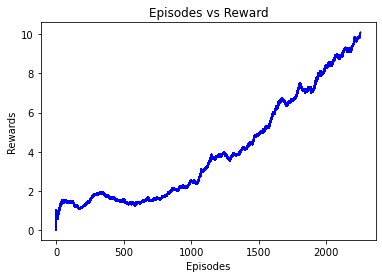

In [ ]:
rewards, episodes = [], []
best_eval_reward = 0
halt_flag = 0

for e in range(EPISODES):
    done = False
    score = 0

    history = np.zeros([5, 84, 84], dtype=np.uint8)
    step = 0
    state, _ = env.reset()
    next_state = state
    life = number_lives

    get_init_state(history, state, HISTORY_SIZE)

    while not done:
        step += 1
        frame += 1

        # Perform a fire action if ball is no longer on screen to continue onto next life
        if step > 1 and len(np.unique(next_state[:189] == state[:189])) < 2:
            action = torch.tensor([[0]]).cuda()
        else:
            action = agent.get_action(np.float32(history[:4, :, :]) / 255.)
#             print(action)
        state = next_state
#         next_state, reward, done, info = env.step(action + 1)
        next_state, reward, terminated, truncated, info = env.step(action + 1)
        done = terminated or truncated

        frame_next_state = get_frame(next_state)
        history[4, :, :] = frame_next_state
        terminal_state = check_live(life, info['lives'])

        life = info['lives']
        r = reward

        # Store the transition in memory
        agent.memory.push(deepcopy(frame_next_state), action.cpu(), r, terminal_state)
#         agent.memory.push(deepcopy(frame_next_state), action, r, terminal_state)
        # Start training after random sample generation
        if(frame >= train_frame): # You can set train_frame to a lower value while testing your starts training earlier
#         if frame >= 200:
            agent.train_policy_net(frame)
            # Update the target network only for Double DQN only
            if double_dqn and (frame % update_target_network_frequency)== 0:
                agent.update_target_net()
        score += reward
        history[:4, :, :] = history[1:, :, :]

        if done:
            evaluation_reward.append(score)
            rewards.append(np.mean(evaluation_reward))
            episodes.append(e)
            pylab.plot(episodes, rewards, 'b')
            pylab.xlabel('Episodes')
            pylab.ylabel('Rewards')
            pylab.title('Episodes vs Reward')
            pylab.savefig("./save_graph/breakout_double_dqn.png") # save graph for training visualization

            # every episode, plot the play time
            print("episode:", e, "  score:", score, "  memory length:",
                  len(agent.memory), "  epsilon:", agent.epsilon, "   steps:", step,
                  "   lr:", agent.optimizer.param_groups[0]['lr'], "    evaluation reward:", np.mean(evaluation_reward))

            # if the mean of scores of last 100 episode is bigger than 5 save model
            ### Change this save condition to whatever you prefer ###
            if np.mean(evaluation_reward) > 10.0 and np.mean(evaluation_reward) > best_eval_reward:
                torch.save(agent.policy_net, "./save_model/breakout_double_dqn.pth")
                best_eval_reward = np.mean(evaluation_reward)
                if np.mean(evaluation_reward) > 10.1:
                    halt_flag = 1
                    break
    if halt_flag == 1:
        break


In [ ]:
torch.save(agent.policy_net, "./save_model/breakout_double_dqn_latest.pth")

# Visualize Agent Performance

BE AWARE THIS CODE BELOW MAY CRASH THE KERNEL IF YOU RUN THE SAME CELL TWICE.

Please save your model before running this portion of the code.

In [ ]:
!pip install moviepy

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 388 kB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 26.9 MB 123.3 MB/s eta 0:00:01�███████████        | 20.2 MB 123.3 MB/s eta 0:00:01
  Created wheel for moviepy: filename=moviepy-1.0.3-py3-none-any.whl size=110728 sha256=3a23de15db3feafec79be85e1ff4f8366abf146c22d452069fe60e8cfa16afc6
  Stored in directory: /u/qilong/.cache/pip/wheels/29/15/e4/4f790bec6acd51a00b67e8ee1394f0bc6e0135c315f8ff399a
Successfully built moviepy


## DQN

In [ ]:
from gym.wrappers import RecordVideo # If importing monitor raises issues, try using `from gym.wrappers import RecordVideo`
import glob
import io
import base64

from IPython.display import HTML
from IPython import display as ipythondisplay

from pyvirtualdisplay import Display

env = gym.make('BreakoutDeterministic-v4', render_mode='rgb_array')
state = env.reset()
number_lives = find_max_lives(env)
state_size = env.observation_space.shape
action_size = 3 #fire, left, and right

# Displaying the game live
def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s | Step: %d %s" % ("Agent Playing",step, info))
    plt.axis('off')

    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())

# Recording the game and replaying the game afterwards
def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) >= 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video style="height: 400px;" controls="" loop="" autoplay="" alt="test">
                <source type="video/mp4" src="data:video/mp4;base64,{0}">
             </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")


def wrap_env(env):
    env = RecordVideo(env, './video')
    return env

from agent import Agent
action_size = 3


# Load agent
agent = Agent(action_size)
agent.load_policy_net("./save_model/breakout_dqn.pth")
agent.epsilon = 0.0 # Set agent to only exploit the best action

env = wrap_env(env)

done = False
score = 0
step = 0
state, _ = env.reset()
next_state = state
life = number_lives
history = np.zeros([5, 84, 84], dtype=np.uint8)
get_init_state(history, state, HISTORY_SIZE)
frame = 0
while not done:
#     show_state(env,step) # uncommenting this provides another way to visualize the game
    step += 1
    frame += 1

    # Perform a fire action if ball is no longer on screen
    if step > 1 and len(np.unique(next_state[:189] == state[:189])) < 2:
        action = 0
    else:
        action = agent.get_action(np.float32(history[:4, :, :]) / 255.)
    state = next_state

    next_state, reward, done, _, info = env.step(action + 1)

    frame_next_state = get_frame(next_state)
    history[4, :, :] = frame_next_state
    terminal_state = check_live(life, info['lives'])

    life = info['lives']
    r = np.clip(reward, -1, 1)
    r = reward

    # Store the transition in memory
    agent.memory.push(deepcopy(frame_next_state), action, r, terminal_state)
    # Start training after random sample generation
    score += reward

    history[:4, :, :] = history[1:, :, :]
env.close()
show_video()

/u/qilong/.local/lib/python3.9/site-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /u/qilong/QA_generator/CS444/mp5/video folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
/u/qilong/.local/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:289: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


Moviepy - Building video /u/qilong/QA_generator/CS444/mp5/video/rl-video-episode-0.mp4.
Moviepy - Writing video /u/qilong/QA_generator/CS444/mp5/video/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /u/qilong/QA_generator/CS444/mp5/video/rl-video-episode-0.mp4


## Double DQN

In [ ]:
from gym.wrappers import RecordVideo # If importing monitor raises issues, try using `from gym.wrappers import RecordVideo`
import glob
import io
import base64

from IPython.display import HTML
from IPython import display as ipythondisplay

from pyvirtualdisplay import Display

env = gym.make('BreakoutDeterministic-v4', render_mode='rgb_array')
state = env.reset()
number_lives = find_max_lives(env)
state_size = env.observation_space.shape
action_size = 3 #fire, left, and right

# Displaying the game live
def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s | Step: %d %s" % ("Agent Playing",step, info))
    plt.axis('off')

    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())

# Recording the game and replaying the game afterwards
def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) >= 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video style="height: 400px;" controls="" loop="" autoplay="" alt="test">
                <source type="video/mp4" src="data:video/mp4;base64,{0}">
             </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")


def wrap_env(env):
    env = RecordVideo(env, './video')
    return env

from agent import Agent
action_size = 3


# Load agent
agent = Agent(action_size)
agent.load_policy_net("./save_model/breakout_double_dqn_latest.pth")
agent.epsilon = 0.0 # Set agent to only exploit the best action

env = wrap_env(env)

done = False
score = 0
step = 0
state, _ = env.reset()
next_state = state
life = number_lives
history = np.zeros([5, 84, 84], dtype=np.uint8)
get_init_state(history, state, HISTORY_SIZE)
frame = 0
while not done:
#     show_state(env,step) # uncommenting this provides another way to visualize the game
    step += 1
    frame += 1

    # Perform a fire action if ball is no longer on screen
    if step > 1 and len(np.unique(next_state[:189] == state[:189])) < 2:
        action = 0
    else:
        action = agent.get_action(np.float32(history[:4, :, :]) / 255.)
    state = next_state

    next_state, reward, done, _, info = env.step(action + 1)

    frame_next_state = get_frame(next_state)
    history[4, :, :] = frame_next_state
    terminal_state = check_live(life, info['lives'])

    life = info['lives']
    r = np.clip(reward, -1, 1)
    r = reward

    # Store the transition in memory
    agent.memory.push(deepcopy(frame_next_state), action, r, terminal_state)
    # Start training after random sample generation
    score += reward

    history[:4, :, :] = history[1:, :, :]
env.close()
show_video()

/u/qilong/.local/lib/python3.9/site-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /u/qilong/QA_generator/CS444/mp5/video folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
/u/qilong/.local/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:289: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


Moviepy - Building video /u/qilong/QA_generator/CS444/mp5/video/rl-video-episode-0.mp4.
Moviepy - Writing video /u/qilong/QA_generator/CS444/mp5/video/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /u/qilong/QA_generator/CS444/mp5/video/rl-video-episode-0.mp4


# Extra Credit 2: Demon Attack

In [ ]:
env = gym.make("ALE/DemonAttack-v5")
state = env.reset()
print(state[0].shape)

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


(210, 160, 3)


In [ ]:
number_lives = find_max_lives(env)
state_size = env.observation_space.shape
action_size = 3 #noop, right, and left
print(number_lives)
print(state_size)
print(action_size)

4
(210, 160, 3)
3


## DQN

In [ ]:
double_dqn = False # set to True if using double DQN agent

if double_dqn:
    from agent_double import Agent
else:
    from agent import Agent

agent = Agent(action_size)
evaluation_reward = deque(maxlen=evaluation_reward_length)
frame = 0
memory_size = 0

episode: 0   score: 140.0   memory length: 647   epsilon: 1.0    steps: 647    lr: 0.0001     evaluation reward: 140.0
episode: 1   score: 100.0   memory length: 1245   epsilon: 1.0    steps: 598    lr: 0.0001     evaluation reward: 120.0
episode: 2   score: 140.0   memory length: 1970   epsilon: 1.0    steps: 725    lr: 0.0001     evaluation reward: 126.66666666666667
episode: 3   score: 70.0   memory length: 2480   epsilon: 1.0    steps: 510    lr: 0.0001     evaluation reward: 112.5
episode: 4   score: 70.0   memory length: 2883   epsilon: 1.0    steps: 403    lr: 0.0001     evaluation reward: 104.0
episode: 5   score: 175.0   memory length: 4149   epsilon: 1.0    steps: 1266    lr: 0.0001     evaluation reward: 115.83333333333333
episode: 6   score: 100.0   memory length: 4717   epsilon: 1.0    steps: 568    lr: 0.0001     evaluation reward: 113.57142857142857
episode: 7   score: 110.0   memory length: 5451   epsilon: 1.0    steps: 734    lr: 0.0001     evaluation reward: 113.125
e

episode: 63   score: 90.0   memory length: 56617   epsilon: 1.0    steps: 676    lr: 0.0001     evaluation reward: 142.109375
episode: 64   score: 80.0   memory length: 57216   epsilon: 1.0    steps: 599    lr: 0.0001     evaluation reward: 141.15384615384616
episode: 65   score: 80.0   memory length: 57695   epsilon: 1.0    steps: 479    lr: 0.0001     evaluation reward: 140.22727272727272
episode: 66   score: 130.0   memory length: 58652   epsilon: 1.0    steps: 957    lr: 0.0001     evaluation reward: 140.07462686567163
episode: 67   score: 100.0   memory length: 59050   epsilon: 1.0    steps: 398    lr: 0.0001     evaluation reward: 139.48529411764707
episode: 68   score: 90.0   memory length: 59604   epsilon: 1.0    steps: 554    lr: 0.0001     evaluation reward: 138.768115942029
episode: 69   score: 325.0   memory length: 61285   epsilon: 1.0    steps: 1681    lr: 0.0001     evaluation reward: 141.42857142857142
episode: 70   score: 205.0   memory length: 62810   epsilon: 1.0    

/u/qilong/QA_generator/CS444/mp5/memory.py:30: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  sample = np.array(sample, dtype=object)
/u/qilong/QA_generator/CS444/mp5/agent.py:63: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created wit

episode: 117   score: 140.0   memory length: 100111   epsilon: 0.9997782400000048    steps: 709    lr: 0.0001     evaluation reward: 137.0
episode: 118   score: 50.0   memory length: 100429   epsilon: 0.9991486000000185    steps: 318    lr: 0.0001     evaluation reward: 136.2
episode: 119   score: 110.0   memory length: 101428   epsilon: 0.9971705800000614    steps: 999    lr: 0.0001     evaluation reward: 135.4
episode: 120   score: 80.0   memory length: 101858   epsilon: 0.9963191800000799    steps: 430    lr: 0.0001     evaluation reward: 135.2
episode: 121   score: 70.0   memory length: 102293   epsilon: 0.9954578800000986    steps: 435    lr: 0.0001     evaluation reward: 135.0
episode: 122   score: 160.0   memory length: 103781   epsilon: 0.9925116400001626    steps: 1488    lr: 0.0001     evaluation reward: 135.3
episode: 123   score: 190.0   memory length: 105192   epsilon: 0.9897178600002232    steps: 1411    lr: 0.0001     evaluation reward: 136.6
episode: 124   score: 295.0 

episode: 176   score: 100.0   memory length: 157430   epsilon: 0.8862866200024686    steps: 734    lr: 0.0001     evaluation reward: 144.3
episode: 177   score: 150.0   memory length: 158425   epsilon: 0.8843165200025114    steps: 995    lr: 0.0001     evaluation reward: 145.1
episode: 178   score: 70.0   memory length: 158762   epsilon: 0.8836492600025259    steps: 337    lr: 0.0001     evaluation reward: 144.4
episode: 179   score: 160.0   memory length: 160314   epsilon: 0.8805763000025926    steps: 1552    lr: 0.0001     evaluation reward: 145.1
episode: 180   score: 100.0   memory length: 160960   epsilon: 0.8792972200026203    steps: 646    lr: 0.0001     evaluation reward: 144.8
episode: 181   score: 130.0   memory length: 161716   epsilon: 0.8778003400026528    steps: 756    lr: 0.0001     evaluation reward: 143.9
episode: 182   score: 190.0   memory length: 162484   epsilon: 0.8762797000026858    steps: 768    lr: 0.0001     evaluation reward: 143.9
episode: 183   score: 120.0

episode: 235   score: 220.0   memory length: 213723   epsilon: 0.7748264800048883    steps: 1590    lr: 4e-05     evaluation reward: 162.75
episode: 236   score: 50.0   memory length: 214125   epsilon: 0.7740305200049056    steps: 402    lr: 4e-05     evaluation reward: 162.15
episode: 237   score: 280.0   memory length: 215698   epsilon: 0.7709159800049732    steps: 1573    lr: 4e-05     evaluation reward: 162.3
episode: 238   score: 70.0   memory length: 216302   epsilon: 0.7697200600049992    steps: 604    lr: 4e-05     evaluation reward: 162.5
episode: 239   score: 250.0   memory length: 217383   epsilon: 0.7675796800050456    steps: 1081    lr: 4e-05     evaluation reward: 162.8
episode: 240   score: 325.0   memory length: 220165   epsilon: 0.7620713200051652    steps: 2782    lr: 4e-05     evaluation reward: 163.85
episode: 241   score: 90.0   memory length: 221068   epsilon: 0.760283380005204    steps: 903    lr: 4e-05     evaluation reward: 163.45
episode: 242   score: 370.0   

episode: 295   score: 150.0   memory length: 262529   epsilon: 0.6781906000069862    steps: 831    lr: 4e-05     evaluation reward: 158.95
episode: 296   score: 140.0   memory length: 263271   epsilon: 0.6767214400070181    steps: 742    lr: 4e-05     evaluation reward: 157.85
episode: 297   score: 190.0   memory length: 263973   epsilon: 0.6753314800070482    steps: 702    lr: 4e-05     evaluation reward: 158.55
episode: 298   score: 265.0   memory length: 264969   epsilon: 0.673359400007091    steps: 996    lr: 4e-05     evaluation reward: 158.55
episode: 299   score: 140.0   memory length: 265905   epsilon: 0.6715061200071313    steps: 936    lr: 4e-05     evaluation reward: 156.85
episode: 300   score: 250.0   memory length: 266933   epsilon: 0.6694706800071755    steps: 1028    lr: 4e-05     evaluation reward: 157.45
episode: 301   score: 140.0   memory length: 267782   epsilon: 0.667789660007212    steps: 849    lr: 4e-05     evaluation reward: 157.75
episode: 302   score: 80.0  

episode: 354   score: 140.0   memory length: 304997   epsilon: 0.5941039600088116    steps: 759    lr: 1.6000000000000003e-05     evaluation reward: 141.8
episode: 355   score: 295.0   memory length: 306031   epsilon: 0.592056640008856    steps: 1034    lr: 1.6000000000000003e-05     evaluation reward: 144.15
episode: 356   score: 295.0   memory length: 307162   epsilon: 0.5898172600089047    steps: 1131    lr: 1.6000000000000003e-05     evaluation reward: 146.5
episode: 357   score: 120.0   memory length: 307822   epsilon: 0.588510460008933    steps: 660    lr: 1.6000000000000003e-05     evaluation reward: 146.5
episode: 358   score: 100.0   memory length: 308556   epsilon: 0.5870571400089646    steps: 734    lr: 1.6000000000000003e-05     evaluation reward: 147.1
episode: 359   score: 30.0   memory length: 308816   epsilon: 0.5865423400089758    steps: 260    lr: 1.6000000000000003e-05     evaluation reward: 147.0
episode: 360   score: 140.0   memory length: 309474   epsilon: 0.58523

episode: 407   score: 175.0   memory length: 344381   epsilon: 0.5161236400105045    steps: 913    lr: 1.6000000000000003e-05     evaluation reward: 142.2
episode: 408   score: 60.0   memory length: 344925   epsilon: 0.5150465200105279    steps: 544    lr: 1.6000000000000003e-05     evaluation reward: 141.6
episode: 409   score: 100.0   memory length: 345575   epsilon: 0.5137595200105558    steps: 650    lr: 1.6000000000000003e-05     evaluation reward: 141.7
episode: 410   score: 175.0   memory length: 346553   epsilon: 0.5118230800105978    steps: 978    lr: 1.6000000000000003e-05     evaluation reward: 142.75
episode: 411   score: 90.0   memory length: 346970   epsilon: 0.5109974200106158    steps: 417    lr: 1.6000000000000003e-05     evaluation reward: 142.05
episode: 412   score: 190.0   memory length: 347867   epsilon: 0.5092213600106543    steps: 897    lr: 1.6000000000000003e-05     evaluation reward: 142.85
episode: 413   score: 235.0   memory length: 348736   epsilon: 0.5075

episode: 460   score: 190.0   memory length: 386355   epsilon: 0.4330151200104307    steps: 1112    lr: 1.6000000000000003e-05     evaluation reward: 157.5
episode: 461   score: 205.0   memory length: 387146   epsilon: 0.4314489400104208    steps: 791    lr: 1.6000000000000003e-05     evaluation reward: 158.15
episode: 462   score: 220.0   memory length: 387927   epsilon: 0.429902560010411    steps: 781    lr: 1.6000000000000003e-05     evaluation reward: 159.35
episode: 463   score: 80.0   memory length: 388513   epsilon: 0.42874228001040365    steps: 586    lr: 1.6000000000000003e-05     evaluation reward: 158.55
episode: 464   score: 280.0   memory length: 389687   epsilon: 0.42641776001038895    steps: 1174    lr: 1.6000000000000003e-05     evaluation reward: 160.95
episode: 465   score: 220.0   memory length: 390837   epsilon: 0.42414076001037454    steps: 1150    lr: 1.6000000000000003e-05     evaluation reward: 161.55
episode: 466   score: 110.0   memory length: 391573   epsilon

episode: 513   score: 235.0   memory length: 430304   epsilon: 0.3459961000098801    steps: 1018    lr: 6.400000000000001e-06     evaluation reward: 170.2
episode: 514   score: 110.0   memory length: 430728   epsilon: 0.3451565800098748    steps: 424    lr: 6.400000000000001e-06     evaluation reward: 169.8
episode: 515   score: 310.0   memory length: 431821   epsilon: 0.3429924400098611    steps: 1093    lr: 6.400000000000001e-06     evaluation reward: 171.8
episode: 516   score: 310.0   memory length: 432807   epsilon: 0.34104016000984877    steps: 986    lr: 6.400000000000001e-06     evaluation reward: 173.7
episode: 517   score: 220.0   memory length: 433566   epsilon: 0.33953734000983926    steps: 759    lr: 6.400000000000001e-06     evaluation reward: 174.15
episode: 518   score: 460.0   memory length: 435130   epsilon: 0.33644062000981967    steps: 1564    lr: 6.400000000000001e-06     evaluation reward: 176.4
episode: 519   score: 295.0   memory length: 436096   epsilon: 0.3345

episode: 566   score: 120.0   memory length: 472216   epsilon: 0.2630103400093551    steps: 1032    lr: 6.400000000000001e-06     evaluation reward: 181.15
episode: 567   score: 175.0   memory length: 473232   epsilon: 0.26099866000934235    steps: 1016    lr: 6.400000000000001e-06     evaluation reward: 179.8
episode: 568   score: 140.0   memory length: 473889   epsilon: 0.2596978000093341    steps: 657    lr: 6.400000000000001e-06     evaluation reward: 180.2
episode: 569   score: 130.0   memory length: 474453   epsilon: 0.25858108000932706    steps: 564    lr: 6.400000000000001e-06     evaluation reward: 180.8
episode: 570   score: 265.0   memory length: 475446   epsilon: 0.2566149400093146    steps: 993    lr: 6.400000000000001e-06     evaluation reward: 182.15
episode: 571   score: 370.0   memory length: 476591   epsilon: 0.2543478400093003    steps: 1145    lr: 6.400000000000001e-06     evaluation reward: 185.25
episode: 572   score: 160.0   memory length: 477319   epsilon: 0.252

episode: 619   score: 160.0   memory length: 513302   epsilon: 0.18166006000884038    steps: 829    lr: 2.560000000000001e-06     evaluation reward: 171.85
episode: 620   score: 30.0   memory length: 513642   epsilon: 0.18098686000883613    steps: 340    lr: 2.560000000000001e-06     evaluation reward: 171.55
episode: 621   score: 355.0   memory length: 514999   epsilon: 0.17830000000881913    steps: 1357    lr: 2.560000000000001e-06     evaluation reward: 174.6
episode: 622   score: 90.0   memory length: 515511   epsilon: 0.1772862400088127    steps: 512    lr: 2.560000000000001e-06     evaluation reward: 173.75
episode: 623   score: 40.0   memory length: 515815   epsilon: 0.1766843200088089    steps: 304    lr: 2.560000000000001e-06     evaluation reward: 170.15
episode: 624   score: 190.0   memory length: 516654   epsilon: 0.1750231000087984    steps: 839    lr: 2.560000000000001e-06     evaluation reward: 171.15
episode: 625   score: 140.0   memory length: 517300   epsilon: 0.17374

episode: 672   score: 100.0   memory length: 553505   epsilon: 0.10205812000849755    steps: 550    lr: 2.560000000000001e-06     evaluation reward: 166.25
episode: 673   score: 175.0   memory length: 554263   epsilon: 0.10055728000849858    steps: 758    lr: 2.560000000000001e-06     evaluation reward: 164.9
episode: 674   score: 190.0   memory length: 555176   epsilon: 0.09874954000849981    steps: 913    lr: 2.560000000000001e-06     evaluation reward: 165.6
episode: 675   score: 190.0   memory length: 555999   epsilon: 0.09712000000850092    steps: 823    lr: 2.560000000000001e-06     evaluation reward: 165.6
episode: 676   score: 250.0   memory length: 557219   epsilon: 0.09470440000850257    steps: 1220    lr: 2.560000000000001e-06     evaluation reward: 167.2
episode: 677   score: 130.0   memory length: 557913   epsilon: 0.0933302800085035    steps: 694    lr: 2.560000000000001e-06     evaluation reward: 167.9
episode: 678   score: 325.0   memory length: 559119   epsilon: 0.0909

episode: 725   score: 60.0   memory length: 593508   epsilon: 0.022852180008551576    steps: 388    lr: 2.560000000000001e-06     evaluation reward: 180.85
episode: 726   score: 50.0   memory length: 593814   epsilon: 0.02224630000855199    steps: 306    lr: 2.560000000000001e-06     evaluation reward: 180.15
episode: 727   score: 140.0   memory length: 594510   epsilon: 0.02086822000855293    steps: 696    lr: 2.560000000000001e-06     evaluation reward: 178.9
episode: 728   score: 190.0   memory length: 595464   epsilon: 0.018979300008554217    steps: 954    lr: 2.560000000000001e-06     evaluation reward: 179.2
episode: 729   score: 120.0   memory length: 595982   epsilon: 0.017953660008554917    steps: 518    lr: 2.560000000000001e-06     evaluation reward: 178.65
episode: 730   score: 310.0   memory length: 597598   epsilon: 0.014753980008556336    steps: 1616    lr: 2.560000000000001e-06     evaluation reward: 180.0
episode: 731   score: 110.0   memory length: 598085   epsilon: 0

episode: 778   score: 250.0   memory length: 631455   epsilon: 0.009998020008555413    steps: 761    lr: 1.0240000000000005e-06     evaluation reward: 177.9
episode: 779   score: 220.0   memory length: 632368   epsilon: 0.009998020008555413    steps: 913    lr: 1.0240000000000005e-06     evaluation reward: 178.35
episode: 780   score: 100.0   memory length: 632880   epsilon: 0.009998020008555413    steps: 512    lr: 1.0240000000000005e-06     evaluation reward: 177.6
episode: 781   score: 100.0   memory length: 633454   epsilon: 0.009998020008555413    steps: 574    lr: 1.0240000000000005e-06     evaluation reward: 175.95
episode: 782   score: 130.0   memory length: 633971   epsilon: 0.009998020008555413    steps: 517    lr: 1.0240000000000005e-06     evaluation reward: 175.95
episode: 783   score: 160.0   memory length: 634746   epsilon: 0.009998020008555413    steps: 775    lr: 1.0240000000000005e-06     evaluation reward: 176.95
episode: 784   score: 220.0   memory length: 635494   

episode: 830   score: 325.0   memory length: 669190   epsilon: 0.009998020008555413    steps: 921    lr: 1.0240000000000005e-06     evaluation reward: 180.25
episode: 831   score: 310.0   memory length: 670130   epsilon: 0.009998020008555413    steps: 940    lr: 1.0240000000000005e-06     evaluation reward: 182.25
episode: 832   score: 280.0   memory length: 671462   epsilon: 0.009998020008555413    steps: 1332    lr: 1.0240000000000005e-06     evaluation reward: 183.55
episode: 833   score: 110.0   memory length: 671953   epsilon: 0.009998020008555413    steps: 491    lr: 1.0240000000000005e-06     evaluation reward: 184.05
episode: 834   score: 175.0   memory length: 672762   epsilon: 0.009998020008555413    steps: 809    lr: 1.0240000000000005e-06     evaluation reward: 184.9
episode: 835   score: 70.0   memory length: 673227   epsilon: 0.009998020008555413    steps: 465    lr: 1.0240000000000005e-06     evaluation reward: 184.5
episode: 836   score: 90.0   memory length: 673621   e

episode: 882   score: 130.0   memory length: 708950   epsilon: 0.009998020008555413    steps: 708    lr: 4.0960000000000023e-07     evaluation reward: 188.2
episode: 883   score: 160.0   memory length: 709739   epsilon: 0.009998020008555413    steps: 789    lr: 4.0960000000000023e-07     evaluation reward: 188.2
episode: 884   score: 160.0   memory length: 710407   epsilon: 0.009998020008555413    steps: 668    lr: 4.0960000000000023e-07     evaluation reward: 187.6
episode: 885   score: 70.0   memory length: 710769   epsilon: 0.009998020008555413    steps: 362    lr: 4.0960000000000023e-07     evaluation reward: 186.8
episode: 886   score: 175.0   memory length: 711351   epsilon: 0.009998020008555413    steps: 582    lr: 4.0960000000000023e-07     evaluation reward: 187.35
episode: 887   score: 140.0   memory length: 711791   epsilon: 0.009998020008555413    steps: 440    lr: 4.0960000000000023e-07     evaluation reward: 187.15
episode: 888   score: 220.0   memory length: 712460   eps

episode: 935   score: 355.0   memory length: 748528   epsilon: 0.009998020008555413    steps: 1089    lr: 4.0960000000000023e-07     evaluation reward: 195.45
episode: 936   score: 80.0   memory length: 749041   epsilon: 0.009998020008555413    steps: 513    lr: 4.0960000000000023e-07     evaluation reward: 195.35
episode: 937   score: 355.0   memory length: 750332   epsilon: 0.009998020008555413    steps: 1291    lr: 4.0960000000000023e-07     evaluation reward: 195.8
episode: 938   score: 90.0   memory length: 750800   epsilon: 0.009998020008555413    steps: 468    lr: 4.0960000000000023e-07     evaluation reward: 193.75
episode: 939   score: 280.0   memory length: 751602   epsilon: 0.009998020008555413    steps: 802    lr: 4.0960000000000023e-07     evaluation reward: 194.35
episode: 940   score: 370.0   memory length: 752860   epsilon: 0.009998020008555413    steps: 1258    lr: 4.0960000000000023e-07     evaluation reward: 196.75
episode: 941   score: 120.0   memory length: 753644 

episode: 987   score: 400.0   memory length: 791536   epsilon: 0.009998020008555413    steps: 1248    lr: 4.0960000000000023e-07     evaluation reward: 230.75
episode: 988   score: 175.0   memory length: 792173   epsilon: 0.009998020008555413    steps: 637    lr: 4.0960000000000023e-07     evaluation reward: 230.3
episode: 989   score: 325.0   memory length: 793361   epsilon: 0.009998020008555413    steps: 1188    lr: 4.0960000000000023e-07     evaluation reward: 232.35
episode: 990   score: 220.0   memory length: 794324   epsilon: 0.009998020008555413    steps: 963    lr: 4.0960000000000023e-07     evaluation reward: 230.85
episode: 991   score: 150.0   memory length: 794920   epsilon: 0.009998020008555413    steps: 596    lr: 4.0960000000000023e-07     evaluation reward: 230.3
episode: 992   score: 295.0   memory length: 795717   epsilon: 0.009998020008555413    steps: 797    lr: 4.0960000000000023e-07     evaluation reward: 232.45
episode: 993   score: 120.0   memory length: 796134 

episode: 1039   score: 740.0   memory length: 833574   epsilon: 0.009998020008555413    steps: 1957    lr: 1.638400000000001e-07     evaluation reward: 246.15
episode: 1040   score: 205.0   memory length: 834381   epsilon: 0.009998020008555413    steps: 807    lr: 1.638400000000001e-07     evaluation reward: 244.5
episode: 1041   score: 150.0   memory length: 834937   epsilon: 0.009998020008555413    steps: 556    lr: 1.638400000000001e-07     evaluation reward: 244.8
episode: 1042   score: 190.0   memory length: 835658   epsilon: 0.009998020008555413    steps: 721    lr: 1.638400000000001e-07     evaluation reward: 245.1
episode: 1043   score: 70.0   memory length: 835914   epsilon: 0.009998020008555413    steps: 256    lr: 1.638400000000001e-07     evaluation reward: 244.9
episode: 1044   score: 370.0   memory length: 836728   epsilon: 0.009998020008555413    steps: 814    lr: 1.638400000000001e-07     evaluation reward: 245.2
episode: 1045   score: 175.0   memory length: 837515   ep

episode: 1091   score: 175.0   memory length: 877588   epsilon: 0.009998020008555413    steps: 855    lr: 1.638400000000001e-07     evaluation reward: 238.4
episode: 1092   score: 265.0   memory length: 878459   epsilon: 0.009998020008555413    steps: 871    lr: 1.638400000000001e-07     evaluation reward: 238.1
episode: 1093   score: 80.0   memory length: 878832   epsilon: 0.009998020008555413    steps: 373    lr: 1.638400000000001e-07     evaluation reward: 237.7
episode: 1094   score: 160.0   memory length: 879472   epsilon: 0.009998020008555413    steps: 640    lr: 1.638400000000001e-07     evaluation reward: 238.4
episode: 1095   score: 150.0   memory length: 880131   epsilon: 0.009998020008555413    steps: 659    lr: 1.638400000000001e-07     evaluation reward: 239.1
episode: 1096   score: 325.0   memory length: 881241   epsilon: 0.009998020008555413    steps: 1110    lr: 1.638400000000001e-07     evaluation reward: 241.15
episode: 1097   score: 60.0   memory length: 881592   eps

episode: 1144   score: 480.0   memory length: 921698   epsilon: 0.009998020008555413    steps: 1419    lr: 6.553600000000004e-08     evaluation reward: 236.25
episode: 1145   score: 295.0   memory length: 922782   epsilon: 0.009998020008555413    steps: 1084    lr: 6.553600000000004e-08     evaluation reward: 237.45
episode: 1146   score: 295.0   memory length: 923764   epsilon: 0.009998020008555413    steps: 982    lr: 6.553600000000004e-08     evaluation reward: 238.35
episode: 1147   score: 190.0   memory length: 924546   epsilon: 0.009998020008555413    steps: 782    lr: 6.553600000000004e-08     evaluation reward: 236.85
episode: 1148   score: 40.0   memory length: 924812   epsilon: 0.009998020008555413    steps: 266    lr: 6.553600000000004e-08     evaluation reward: 235.2
episode: 1149   score: 160.0   memory length: 925609   epsilon: 0.009998020008555413    steps: 797    lr: 6.553600000000004e-08     evaluation reward: 233.55
episode: 1150   score: 250.0   memory length: 926479

episode: 1196   score: 205.0   memory length: 960533   epsilon: 0.009998020008555413    steps: 588    lr: 6.553600000000004e-08     evaluation reward: 221.35
episode: 1197   score: 175.0   memory length: 961205   epsilon: 0.009998020008555413    steps: 672    lr: 6.553600000000004e-08     evaluation reward: 222.5
episode: 1198   score: 100.0   memory length: 961787   epsilon: 0.009998020008555413    steps: 582    lr: 6.553600000000004e-08     evaluation reward: 222.6
episode: 1199   score: 250.0   memory length: 962678   epsilon: 0.009998020008555413    steps: 891    lr: 6.553600000000004e-08     evaluation reward: 223.35
episode: 1200   score: 295.0   memory length: 963645   epsilon: 0.009998020008555413    steps: 967    lr: 6.553600000000004e-08     evaluation reward: 225.2
episode: 1201   score: 280.0   memory length: 964706   epsilon: 0.009998020008555413    steps: 1061    lr: 6.553600000000004e-08     evaluation reward: 223.2
episode: 1202   score: 840.0   memory length: 965904   

episode: 1248   score: 130.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 584    lr: 2.6214400000000017e-08     evaluation reward: 216.9
episode: 1249   score: 235.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 702    lr: 2.6214400000000017e-08     evaluation reward: 217.65
episode: 1250   score: 190.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 678    lr: 2.6214400000000017e-08     evaluation reward: 217.05
episode: 1251   score: 220.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 855    lr: 2.6214400000000017e-08     evaluation reward: 217.75
episode: 1252   score: 760.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 1646    lr: 2.6214400000000017e-08     evaluation reward: 220.15
episode: 1253   score: 280.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 845    lr: 2.6214400000000017e-08     evaluation reward: 222.05
episode: 1254   score: 160.0   memory le

episode: 1300   score: 295.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 949    lr: 2.6214400000000017e-08     evaluation reward: 223.0
episode: 1301   score: 280.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 807    lr: 2.6214400000000017e-08     evaluation reward: 223.0
episode: 1302   score: 130.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 500    lr: 2.6214400000000017e-08     evaluation reward: 215.9
episode: 1303   score: 190.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 822    lr: 2.6214400000000017e-08     evaluation reward: 216.05
episode: 1304   score: 80.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 486    lr: 2.6214400000000017e-08     evaluation reward: 215.45
episode: 1305   score: 235.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 865    lr: 2.6214400000000017e-08     evaluation reward: 215.3
episode: 1306   score: 90.0   memory length: 

episode: 1352   score: 295.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 1326    lr: 2.6214400000000017e-08     evaluation reward: 204.7
episode: 1353   score: 1400.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 1872    lr: 2.6214400000000017e-08     evaluation reward: 215.9
episode: 1354   score: 190.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 806    lr: 2.6214400000000017e-08     evaluation reward: 216.2
episode: 1355   score: 175.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 808    lr: 2.6214400000000017e-08     evaluation reward: 215.0
episode: 1356   score: 160.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 617    lr: 2.6214400000000017e-08     evaluation reward: 213.65
episode: 1357   score: 130.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 671    lr: 2.6214400000000017e-08     evaluation reward: 212.45
episode: 1358   score: 140.0   memory len

episode: 1404   score: 220.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 911    lr: 1.0485760000000008e-08     evaluation reward: 214.65
episode: 1405   score: 50.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 263    lr: 1.0485760000000008e-08     evaluation reward: 212.8
episode: 1406   score: 295.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 1141    lr: 1.0485760000000008e-08     evaluation reward: 214.85
episode: 1407   score: 370.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 1055    lr: 1.0485760000000008e-08     evaluation reward: 217.45
episode: 1408   score: 160.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 791    lr: 1.0485760000000008e-08     evaluation reward: 217.75
episode: 1409   score: 325.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 1382    lr: 1.0485760000000008e-08     evaluation reward: 219.8
episode: 1410   score: 250.0   memory le

episode: 1456   score: 325.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 902    lr: 1.0485760000000008e-08     evaluation reward: 203.2
episode: 1457   score: 265.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 854    lr: 1.0485760000000008e-08     evaluation reward: 204.55
episode: 1458   score: 175.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 802    lr: 1.0485760000000008e-08     evaluation reward: 204.9
episode: 1459   score: 205.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 929    lr: 1.0485760000000008e-08     evaluation reward: 204.45
episode: 1460   score: 190.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 784    lr: 1.0485760000000008e-08     evaluation reward: 203.25
episode: 1461   score: 190.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 574    lr: 1.0485760000000008e-08     evaluation reward: 203.65
episode: 1462   score: 295.0   memory leng

episode: 1508   score: 150.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 461    lr: 4.194304000000004e-09     evaluation reward: 211.9
episode: 1509   score: 150.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 594    lr: 4.194304000000004e-09     evaluation reward: 210.15
episode: 1510   score: 250.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 1091    lr: 4.194304000000004e-09     evaluation reward: 210.15
episode: 1511   score: 50.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 300    lr: 4.194304000000004e-09     evaluation reward: 208.45
episode: 1512   score: 90.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 410    lr: 4.194304000000004e-09     evaluation reward: 208.25
episode: 1513   score: 295.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 1227    lr: 4.194304000000004e-09     evaluation reward: 207.5
episode: 1514   score: 130.0   memory length: 10

episode: 1560   score: 70.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 323    lr: 4.194304000000004e-09     evaluation reward: 213.8
episode: 1561   score: 160.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 568    lr: 4.194304000000004e-09     evaluation reward: 213.5
episode: 1562   score: 140.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 775    lr: 4.194304000000004e-09     evaluation reward: 211.95
episode: 1563   score: 90.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 392    lr: 4.194304000000004e-09     evaluation reward: 211.35
episode: 1564   score: 175.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 721    lr: 4.194304000000004e-09     evaluation reward: 212.2
episode: 1565   score: 140.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 651    lr: 4.194304000000004e-09     evaluation reward: 210.5
episode: 1566   score: 175.0   memory length: 100000

episode: 1612   score: 140.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 476    lr: 4.194304000000004e-09     evaluation reward: 206.55
episode: 1613   score: 160.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 684    lr: 4.194304000000004e-09     evaluation reward: 205.2
episode: 1614   score: 280.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 1191    lr: 4.194304000000004e-09     evaluation reward: 206.7
episode: 1615   score: 340.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 1251    lr: 4.194304000000004e-09     evaluation reward: 207.45
episode: 1616   score: 295.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 1040    lr: 4.194304000000004e-09     evaluation reward: 209.1
episode: 1617   score: 160.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 810    lr: 4.194304000000004e-09     evaluation reward: 208.2
episode: 1618   score: 250.0   memory length: 1

episode: 1664   score: 100.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 513    lr: 1.6777216000000016e-09     evaluation reward: 214.25
episode: 1665   score: 280.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 924    lr: 1.6777216000000016e-09     evaluation reward: 215.65
episode: 1666   score: 340.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 1147    lr: 1.6777216000000016e-09     evaluation reward: 217.3
episode: 1667   score: 190.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 691    lr: 1.6777216000000016e-09     evaluation reward: 216.85
episode: 1668   score: 160.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 603    lr: 1.6777216000000016e-09     evaluation reward: 211.05
episode: 1669   score: 310.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 927    lr: 1.6777216000000016e-09     evaluation reward: 212.65
episode: 1670   score: 190.0   memory le

episode: 1716   score: 250.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 966    lr: 1.6777216000000016e-09     evaluation reward: 208.65
episode: 1717   score: 190.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 582    lr: 1.6777216000000016e-09     evaluation reward: 208.95
episode: 1718   score: 280.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 1033    lr: 1.6777216000000016e-09     evaluation reward: 209.25
episode: 1719   score: 220.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 935    lr: 1.6777216000000016e-09     evaluation reward: 210.25
episode: 1720   score: 325.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 1343    lr: 1.6777216000000016e-09     evaluation reward: 211.6
episode: 1721   score: 150.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 679    lr: 1.6777216000000016e-09     evaluation reward: 212.5
episode: 1722   score: 340.0   memory le

episode: 1768   score: 370.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 1212    lr: 1.6777216000000016e-09     evaluation reward: 222.75
episode: 1769   score: 80.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 939    lr: 6.710886400000007e-10     evaluation reward: 220.45
episode: 1770   score: 120.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 638    lr: 6.710886400000007e-10     evaluation reward: 219.75
episode: 1771   score: 150.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 702    lr: 6.710886400000007e-10     evaluation reward: 219.05
episode: 1772   score: 280.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 822    lr: 6.710886400000007e-10     evaluation reward: 220.75
episode: 1773   score: 295.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 1070    lr: 6.710886400000007e-10     evaluation reward: 222.7
episode: 1774   score: 295.0   memory length:

episode: 1820   score: 100.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 359    lr: 6.710886400000007e-10     evaluation reward: 242.55
episode: 1821   score: 150.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 893    lr: 6.710886400000007e-10     evaluation reward: 242.55
episode: 1822   score: 370.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 1114    lr: 6.710886400000007e-10     evaluation reward: 242.85
episode: 1823   score: 80.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 460    lr: 6.710886400000007e-10     evaluation reward: 241.75
episode: 1824   score: 265.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 755    lr: 6.710886400000007e-10     evaluation reward: 240.85
episode: 1825   score: 110.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 628    lr: 6.710886400000007e-10     evaluation reward: 238.1
episode: 1826   score: 265.0   memory length: 1

episode: 1872   score: 205.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 725    lr: 6.710886400000007e-10     evaluation reward: 213.85
episode: 1873   score: 370.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 1081    lr: 6.710886400000007e-10     evaluation reward: 214.6
episode: 1874   score: 355.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 1025    lr: 6.710886400000007e-10     evaluation reward: 215.2
episode: 1875   score: 1200.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 1933    lr: 6.710886400000007e-10     evaluation reward: 225.0
episode: 1876   score: 120.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 445    lr: 6.710886400000007e-10     evaluation reward: 222.95
episode: 1877   score: 205.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 759    lr: 6.710886400000007e-10     evaluation reward: 219.8
episode: 1878   score: 175.0   memory length: 

episode: 1931   score: 235.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 886    lr: 2.684354560000003e-10     evaluation reward: 195.55
episode: 1932   score: 250.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 935    lr: 2.684354560000003e-10     evaluation reward: 197.05
episode: 1933   score: 235.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 936    lr: 2.684354560000003e-10     evaluation reward: 198.5
episode: 1934   score: 60.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 390    lr: 2.684354560000003e-10     evaluation reward: 197.35
episode: 1935   score: 220.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 775    lr: 2.684354560000003e-10     evaluation reward: 197.2
episode: 1936   score: 280.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 904    lr: 2.684354560000003e-10     evaluation reward: 198.6
episode: 1937   score: 120.0   memory length: 1000

episode: 1983   score: 235.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 850    lr: 2.684354560000003e-10     evaluation reward: 225.5
episode: 1984   score: 420.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 1215    lr: 2.684354560000003e-10     evaluation reward: 227.95
episode: 1985   score: 220.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 1006    lr: 2.684354560000003e-10     evaluation reward: 226.9
episode: 1986   score: 80.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 393    lr: 2.684354560000003e-10     evaluation reward: 224.9
episode: 1987   score: 250.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 727    lr: 2.684354560000003e-10     evaluation reward: 225.05
episode: 1988   score: 205.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 567    lr: 2.684354560000003e-10     evaluation reward: 226.0
episode: 1989   score: 205.0   memory length: 100

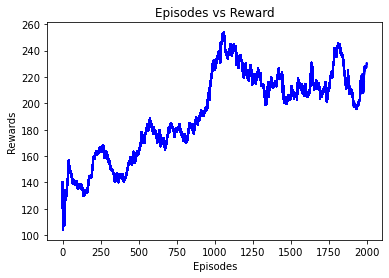

In [ ]:
rewards, episodes = [], []
best_eval_reward = 0
halt_flag = 0

for e in range(EPISODES):
    done = False
    score = 0

    history = np.zeros([5, 84, 84], dtype=np.uint8)
    step = 0
    state, _ = env.reset()
    next_state = state
    life = number_lives

    get_init_state(history, state, HISTORY_SIZE)

    while not done:
        step += 1
        frame += 1

        # Take action
        action = agent.get_action(np.float32(history[:4, :, :]) / 255.)

        state = next_state
        next_state, reward, terminated, truncated, info = env.step(action + 1)
        done = terminated or truncated

        frame_next_state = get_frame(next_state)
        history[4, :, :] = frame_next_state
        terminal_state = check_live(life, info['lives'])

        life = info['lives']
        r = reward

        # Store the transition in memory
        agent.memory.push(deepcopy(frame_next_state), action.cpu(), r, terminal_state)
#         agent.memory.push(deepcopy(frame_next_state), action, r, terminal_state)
        # Start training after random sample generation
        if(frame >= train_frame): # You can set train_frame to a lower value while testing your starts training earlier
#         if frame >= 100:
            agent.train_policy_net(frame)
            # Update the target network only for Double DQN only
            if double_dqn and (frame % update_target_network_frequency)== 0:
                agent.update_target_net()
        score += reward
        history[:4, :, :] = history[1:, :, :]

        if done:
            evaluation_reward.append(score)
            rewards.append(np.mean(evaluation_reward))
            episodes.append(e)
            pylab.plot(episodes, rewards, 'b')
            pylab.xlabel('Episodes')
            pylab.ylabel('Rewards')
            pylab.title('Episodes vs Reward')
            pylab.savefig("./save_graph/demonattack_dqn.png") # save graph for training visualization

            # every episode, plot the play time
            print("episode:", e, "  score:", score, "  memory length:",
                  len(agent.memory), "  epsilon:", agent.epsilon, "   steps:", step,
                  "   lr:", agent.optimizer.param_groups[0]['lr'], "    evaluation reward:", np.mean(evaluation_reward))

In [ ]:
torch.save(agent.policy_net, "./save_model/demonattack_dqn_latest.pth")

In [ ]:
from gym.wrappers import RecordVideo # If importing monitor raises issues, try using `from gym.wrappers import RecordVideo`
import glob
import io
import base64

from IPython.display import HTML
from IPython import display as ipythondisplay

from pyvirtualdisplay import Display

env = gym.make('ALE/DemonAttack-v5', render_mode='rgb_array')
state = env.reset()
number_lives = find_max_lives(env)
state_size = env.observation_space.shape
action_size = 3 #fire, left, and right

# Displaying the game live
def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s | Step: %d %s" % ("Agent Playing",step, info))
    plt.axis('off')

    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())

# Recording the game and replaying the game afterwards
def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) >= 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video style="height: 400px;" controls="" loop="" autoplay="" alt="test">
                <source type="video/mp4" src="data:video/mp4;base64,{0}">
             </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")


def wrap_env(env):
    env = RecordVideo(env, './video')
    return env

from agent import Agent
action_size = 3


# Load agent
agent = Agent(action_size)
agent.load_policy_net("./save_model/demonattack_dqn_latest.pth")
agent.epsilon = 0.0 # Set agent to only exploit the best action

env = wrap_env(env)

done = False
score = 0
step = 0
state, _ = env.reset()
next_state = state
life = number_lives
history = np.zeros([5, 84, 84], dtype=np.uint8)
get_init_state(history, state, HISTORY_SIZE)
frame = 0
while not done:
#     show_state(env,step) # uncommenting this provides another way to visualize the game
    step += 1
    frame += 1

    action = agent.get_action(np.float32(history[:4, :, :]) / 255.)
    state = next_state

    next_state, reward, done, _, info = env.step(action + 1)

    frame_next_state = get_frame(next_state)
    history[4, :, :] = frame_next_state
    terminal_state = check_live(life, info['lives'])

    life = info['lives']
    r = np.clip(reward, -1, 1)
    r = reward

    # Store the transition in memory
    agent.memory.push(deepcopy(frame_next_state), action, r, terminal_state)
    # Start training after random sample generation
    score += reward

    history[:4, :, :] = history[1:, :, :]
env.close()
show_video()

/u/qilong/.local/lib/python3.9/site-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /u/qilong/QA_generator/CS444/mp5/video folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
/u/qilong/.local/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:289: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


Moviepy - Building video /u/qilong/QA_generator/CS444/mp5/video/rl-video-episode-0.mp4.
Moviepy - Writing video /u/qilong/QA_generator/CS444/mp5/video/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /u/qilong/QA_generator/CS444/mp5/video/rl-video-episode-0.mp4


# Save as PDF

In [3]:
%%capture

from google.colab import drive
drive.mount('/content/drive')
# install tex; first run may take several minutes
! apt-get install texlive-xetex
# file path and save location below are default; please change if they do not match yours
! jupyter nbconvert --output-dir='/content/drive/MyDrive/' '/content/drive/MyDrive/CS444/assignment5/MP5.ipynb' --to pdf